# The life of an athlete with type 1 diabetes: descriptives

Descriptives for the 2019 training season of 14 TNN athletes

In [1]:
import numpy as np
import pandas as pd
import datetime
import os
from copy import copy

from plot import *
from calc import glucose_levels, mmoll_mgdl, mgdl_mmoll, timestamp_to_seconds
from calc import stats_cgm as stat_func
from config import DATA_PATH, SAVE_PATH

In [2]:
SAVE_PATH = 'descriptives/'

for folder in ('availability', 'hist', 'cdf', 'boxplot', 'time_in_zone', 'time_cycling', 'events'):
    if not os.path.exists(SAVE_PATH+'Dexcom/'+folder):
        os.makedirs(SAVE_PATH+'Dexcom/'+folder)

In [3]:
COL = 'Glucose Value (mg/dL)'

In [4]:
SECTIONS = ('wake', 'exercise', 'recovery', 'sleep')

In [5]:
# perform some adjustments to the glucose levels, so that floats don't fall in between glucose levels
# e.g. 69.5 falls in between 69 and 70
glucose_levels = {level: (lmin-(1-1e-8), lmax) if level.startswith('hyper') else (
    (lmin, lmax+(1-1e-8)) if level.startswith('hypo') else (
    (lmin, lmax))) for level, (lmin, lmax) in glucose_levels.items()}

section palette


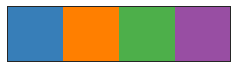

athlete palette


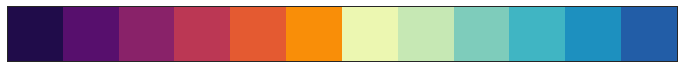

race palette


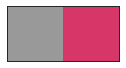

In [6]:
print("section palette")
sns.palplot(color_sec.values()) ; plt.show()

print("athlete palette")
sns.palplot(palette_ath) ; plt.show()

print("race palette")
sns.palplot(color_race.values()) ; plt.show()

## Data

### Read data

**Athlete characteristics**

In [7]:
info = pd.read_csv(DATA_PATH+'agg/info.csv')
info = info.reset_index()
info = info.rename(columns={'index':'RIDER'})
info

RIDER gender  nationality  age  diabetes_duration     weight      bf(%)  \
0       1      M  Switzerland   22                 11  60.500000   9.066667   
1       2      M        Italy   30                 14  71.633333   8.833333   
2       3      M      Ireland   26                  7  66.733333   6.566667   
3       4      M    Australia   19                  7  78.666667   9.433333   
4       5      M  Netherlands   25                  6  69.633333   7.700000   
5       6      M    Australia   20                  9  56.700000   4.950000   
6       7      M        Italy   22                  6  65.333333   8.066667   
7       8      M  New Zealand   20                 17  65.000000  11.900000   
8       9      M       France   23                 10  63.100000   8.533333   
9      10      M           UK   27                 17  75.466667   7.700000   
10     11      M  Netherlands   24                 15  70.700000   8.900000   
11     12      M        Spain   30                  8  64.000000   5.600000   
12     13      M      Hungary   34                  1  60.333333   4.866667   
13     14      M      Finland   27                 17  75.166667   9.333333   
14     15      M       France   25                 15  73.766667   7.200000   
15     16      M   Uzbekistan   22                 13  56.666667   9.466667   
16     17      M       France   22                  4        NaN        NaN   
17     18      M           US   26                  2        NaN        NaN   

    HbA1c         FTP        LTHR       HRmax     VO2max  height  
0     6.7  307.000000  176.333333  192.333333  68.888889   174.0  
1     6.6  326.000000  168.666667  181.666667  66.915285   178.0  
2     6.8  298.000000  171.000000  180.000000  66.666164   171.0  
3     7.8  356.000000  170.333333  187.333333  67.333333   178.0  
4     6.5  341.000000  179.666667  192.666667  72.857143   183.0  
5     6.4  298.500000  173.000000  184.500000  70.781588   169.0  
6     5.9  298.500000  171.500000  180.500000  72.203125   167.0  
7     7.7  292.000000  187.000000  204.000000  64.000000   165.0  
8     7.2  278.666667  182.333333  195.000000  67.522310   173.0  
9     7.3  377.333333  177.000000  194.333333  73.982571   185.0  
10    6.4  317.000000  175.000000  190.000000  65.000000   179.0  
11    6.0  347.000000  158.333333  178.666667  75.937500   178.0  
12    6.3  345.666667  173.000000  182.333333  76.666667   179.0  
13    7.1  348.000000  169.000000  189.500000  66.500000   187.0  
14    6.4  389.000000  185.000000  198.000000  66.000000   179.0  
15    6.6  283.333333  125.610000  200.333333  74.678571   170.0  
16    NaN         NaN         NaN         NaN        NaN   167.0  
17    NaN         NaN         NaN         NaN        NaN   180.0

**Professional**

In [8]:
pro = pd.read_csv(DATA_PATH+'info/pro.csv')
pro = pro.sort_values('RIDER')

Select only people for whom we have *ethics*

In [9]:
pro = pro[pro.ethics == 1]
pro = pro.drop('ethics', axis=1)

# anonymize file
pro = pro.drop('name', axis=1)
pro['RIDER'] = pro['RIDER'].astype(int)
pro = pro.reset_index(drop=True)

pro

RIDER 2014 2015 2016 2017 2018 2019 2020 2021
0       1    -    -    -  DEV  DEV  PRO  PRO  PRO
1       2  PRO  PRO  PRO  PRO  PRO  PRO  PRO  PRO
2       3  PRO  PRO  PRO  PRO  PRO  PRO  PRO  PRO
3       4    -    -    -  DEV  PRO  PRO  PRO  PRO
4       5    -  PRO  PRO  PRO  PRO  PRO  PRO  PRO
5       6    -    -    -  DEV  DEV  PRO  PRO  PRO
6       7    -    -  DEV  PRO  PRO  PRO  PRO  PRO
7       8    -    -    -  DEV  DEV  DEV  PRO  PRO
8       9    -    -    -  PRO  PRO  PRO  PRO  PRO
9      10    -    -  DEV  DEV  PRO  PRO  PRO  PRO
10     11    -  PRO  PRO  PRO    -  DEV  PRO  PRO
11     12  PRO  PRO  PRO  PRO  PRO  PRO  PRO  PRO
12     13    -    -    -    -    -  PRO  PRO  PRO
13     14  PRO  PRO  PRO  PRO  PRO  PRO  PRO  PRO
14     15  PRO  PRO  PRO  PRO  PRO  PRO  PRO  PRO
15     16    -    -    -  DEV  DEV  PRO  PRO  DEV
16     17    -    -    -    -    -    -    -    -
17     18    -    -    -  DEV  DEV  DEV  DEV  PRO

**Season dates**

In [10]:
season = pd.read_csv(DATA_PATH+'calendar/season_dates.csv', index_col=[0,1], header=[0,1])
season = season.reset_index().drop('level_1', axis=1)
season = season.rename(columns={'level_0':'RIDER'})
season

/local/home/evanweenen/.local/lib/python3.7/site-packages/pandas/core/generic.py:4150: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


RIDER        2015                    2016                    2017  \
               start         end       start         end       start   
0      1         NaN         NaN         NaN         NaN  2016-12-06   
1      2  2014-11-17  2015-10-18  2015-11-24  2016-10-28  2016-11-15   
2      3  2014-11-06  2015-10-18  2015-11-06  2016-10-23  2016-12-06   
3      4         NaN         NaN         NaN         NaN  2016-11-15   
4      5  2014-11-14  2015-11-08  2015-11-27  2016-10-30  2016-11-12   
5      6         NaN         NaN         NaN         NaN  2016-12-12   
6      7         NaN         NaN  2015-10-07  2016-04-16  2016-11-07   
7      8         NaN         NaN         NaN         NaN  2016-12-14   
8      9         NaN         NaN         NaN         NaN  2016-12-06   
9     10         NaN         NaN  2015-11-06  2016-10-17  2016-11-04   
10    11  2014-11-02  2015-11-12  2015-12-01  2016-11-12  2016-12-07   
11    12  2014-11-15  2015-10-29  2015-11-24  2016-10-22  2016-11-07   
12    13         NaN         NaN         NaN         NaN         NaN   
13    14  2014-11-14  2015-10-25  2015-12-02  2016-10-30  2016-11-13   
14    15  2014-11-17  2015-10-18  2015-11-12  2016-10-23  2016-11-14   
15    16         NaN         NaN         NaN         NaN  2016-12-14   
16    17         NaN         NaN         NaN         NaN         NaN   
17    18         NaN         NaN         NaN         NaN  2016-12-13   

                      2018                    2019                    2020  \
           end       start         end       start         end       start   
0   2017-11-05  2017-11-13  2018-10-20  2018-11-05  2019-10-20  2019-11-04   
1   2017-09-11  2017-10-23  2018-10-02  2018-10-23  2019-10-16  2019-11-04   
2   2017-10-05  2017-11-13  2018-10-31  2018-11-19  2019-10-20  2019-11-13   
3   2017-09-30  2017-10-05  2018-11-01  2018-11-12  2019-10-16  2019-11-04   
4   2017-09-23  2017-10-03  2018-10-17  2018-11-12  2019-10-20  2019-11-11   
5   2017-10-14  2017-10-30  2018-10-25  2018-12-01  2019-10-01  2019-10-21   
6   2017-11-05  2017-11-28  2018-10-17  2018-11-29  2019-10-27  2019-12-02   
7   2017-11-05  2017-11-19  2018-12-12  2018-12-24  2019-10-16  2019-10-24   
8   2017-11-05  2017-11-20  2018-09-24  2018-11-05  2019-09-23  2019-10-14   
9   2017-11-12  2017-11-27  2018-11-10  2018-11-22  2019-10-28  2019-11-11   
10  2017-10-22         NaN         NaN  2018-10-15  2019-06-23  2019-10-23   
11  2017-10-31  2017-11-06  2018-11-11  2018-11-26  2019-11-05  2019-11-18   
12         NaN         NaN         NaN  2018-12-12  2019-10-20  2019-11-18   
13  2017-11-20  2017-12-21  2018-11-01  2018-11-12  2019-09-09  2019-10-21   
14  2017-11-01  2017-11-27  2018-10-21  2018-11-12  2019-10-20  2019-11-09   
15  2017-09-10  2017-11-21  2018-11-02  2018-11-19  2019-09-29  2019-11-14   
16         NaN         NaN         NaN         NaN         NaN         NaN   
17  2017-10-22  2017-11-20  2018-08-12  2018-10-22  2019-10-13  2019-11-09   

                      2021              
           end       start         end  
0   2020-09-23  2020-10-08  2021-10-30  
1   2020-10-11  2020-11-09  2021-10-04  
2   2020-10-16  2020-11-16  2021-10-03  
3   2020-10-28  2020-11-16  2021-08-14  
4   2020-10-31  2020-11-16  2021-08-31  
5   2020-07-17  2020-11-01  2021-09-03  
6   2020-10-12  2020-11-09  2021-09-30  
7   2020-09-27  2020-11-01  2021-10-03  
8   2020-10-12  2020-11-05  2021-10-01  
9   2020-10-11  2020-11-16  2021-10-17  
10  2020-10-02  2020-11-01  2021-09-17  
11  2020-10-08  2020-11-01  2021-09-03  
12  2020-10-11  2020-11-16  2021-09-05  
13  2020-10-12  2020-11-02  2021-09-20  
14  2020-10-15  2020-11-07  2021-10-29  
15  2020-10-31  2020-11-23  2021-09-30  
16         NaN         NaN         NaN  
17  2020-10-18  2020-11-11  2021-10-05

**TrainingPeaks (aggregated)**

In [11]:
tp_agg = pd.read_csv(DATA_PATH+'agg/trainingpeaks_day.csv', index_col=[0,1], header=[0,1])
tp_agg = tp_agg.reset_index()
tp_agg['date'] = pd.to_datetime(tp_agg['date'])
tp_agg

RIDER       date            TIME                       \
                       timestamp_count  local_timestamp_min   
0         1 2016-11-22          7446.0  2016-11-22 12:58:57   
1         1 2016-11-23          7312.0  2016-11-23 14:29:13   
2         1 2016-11-24          6285.0  2016-11-24 09:53:38   
3         1 2016-11-26          7445.0  2016-11-26 10:00:35   
4         1 2016-12-06         11222.0  2016-12-06 09:11:34   
...     ...        ...             ...                  ...   
30207    18 2021-11-18          4767.0  2021-11-18 14:58:17   
30208    18 2021-11-25         10912.0  2021-11-25 09:50:57   
30209    18 2021-11-26          8737.0  2021-11-26 10:12:34   
30210    18 2021-11-27         18222.0  2021-11-27 09:31:58   
30211    18 2021-11-28         14549.0  2021-11-28 10:02:22   

                           CALENDAR                                   \
       local_timestamp_max     race travel race_3d_mean race_7d_mean   
0      2016-11-22 15:15:40    False   True          0.0          0.0   
1      2016-11-23 16:35:14    False  False          0.0          0.0   
2      2016-11-24 16:56:38    False  False          0.0          0.0   
3      2016-11-26 12:12:52    False  False          0.0          0.0   
4      2016-12-06 16:11:38    False  False          0.0          0.0   
...                    ...      ...    ...          ...          ...   
30207  2021-11-18 16:19:15    False  False          0.0          0.0   
30208  2021-11-25 12:54:14    False  False          0.0          0.0   
30209  2021-11-26 12:39:08    False  False          0.0          0.0   
30210  2021-11-27 14:36:43    False  False          0.0          0.0   
30211  2021-11-28 14:21:57    False  False          0.0          0.0   

                     ...             LOC                                  \
      travel_3d_any  ... distance_up_std distance_up_min distance_up_max   
0              True  ...    17801.944942            3.02        60211.87   
1              True  ...    19148.044265            0.00        66126.45   
2              True  ...     9053.264194            3.43        34317.18   
3             False  ...    18440.805479            1.10        65340.95   
4             False  ...    19543.224138            0.00        64799.24   
...             ...  ...             ...             ...             ...   
30207         False  ...     9128.714210            0.00        29709.74   
30208         False  ...    21912.188008            0.00        80574.10   
30209         False  ...    19439.456819            0.00        62597.98   
30210         False  ...    38862.374584            0.00       130010.95   
30211         False  ...    33132.807679            3.57       109086.89   

                                                                            \
      distance_up_sum distance_up_energy distance_up_peaks distance_up_rms   
0        1.615842e+08       6.454802e+12               0.0    29442.856294   
1        2.109715e+08       9.441041e+12               0.0    35932.864834   
2        6.765391e+07       1.379010e+12               0.0    14812.591736   
3        1.908990e+08       8.218843e+12               0.0    33225.612828   
4        2.761122e+08       1.133536e+13               1.0    31782.096599   
...               ...                ...               ...             ...   
30207    5.001524e+07       1.099600e+12               0.0    15187.800246   
30208    2.989028e+08       1.488329e+13               0.0    36931.529437   
30209    1.875908e+08       8.146286e+12               0.0    30535.051494   
30210    7.310406e+08       6.144018e+13               0.0    58066.844495   
30211    5.640191e+08       4.316849e+13               0.0    54471.190338   

                                                           
      distance_up_iqr acceleration_iqr elevation_gain_iqr  
0                 NaN              NaN                NaN  
1                 NaN              NaN                NaN  
2    

**Dexcom (aggregated)**

In [12]:
dc_agg = pd.read_csv(DATA_PATH+'agg/dexcom_sec.csv')
dc_agg['date'] = pd.to_datetime(dc_agg['date'])
dc_agg

RIDER       date  time_in_hypo_exercise  time_in_hypoL2_exercise  \
0          1 2013-12-31                    NaN                      NaN   
1          1 2014-01-01                    NaN                      NaN   
2          1 2014-01-02                    NaN                      NaN   
3          1 2014-01-03                    NaN                      NaN   
4          1 2014-01-04                    NaN                      NaN   
...      ...        ...                    ...                      ...   
52610     18 2021-12-28                    NaN                      NaN   
52611     18 2021-12-29                    NaN                      NaN   
52612     18 2021-12-30                    NaN                      NaN   
52613     18 2021-12-31                    NaN                      NaN   
52614     18 2022-01-01                    NaN                      NaN   

       time_in_hypoL1_exercise  time_in_target_exercise  \
0                          NaN                      NaN   
1                          NaN                      NaN   
2                          NaN                      NaN   
3                          NaN                      NaN   
4                          NaN                      NaN   
...                        ...                      ...   
52610                      NaN                      NaN   
52611                      NaN                      NaN   
52612                      NaN                      NaN   
52613                      NaN                      NaN   
52614                      NaN                      NaN   

       time_in_hyper_exercise  time_in_hyperL1_exercise  \
0                         NaN                       NaN   
1                         NaN                       NaN   
2                         NaN                       NaN   
3                         NaN                       NaN   
4                         NaN                       NaN   
...                       ...                       ...   
52610                     NaN                       NaN   
52611                     NaN                       NaN   
52612                     NaN                       NaN   
52613                     NaN                       NaN   
52614                     NaN                       NaN   

       time_in_hyperL2_exercise  glucose_mean_exercise  ...  glucose_std_day  \
0                           NaN                    NaN  ...              NaN   
1                           NaN                    NaN  ...              NaN   
2                           NaN                    NaN  ...              NaN   
3                           NaN                    NaN  ...              NaN   
4                           NaN                    NaN  ...              NaN   
...                         ...                    ...  ...              ...   
52610                       NaN                    NaN  ...              NaN   
52611                       NaN                    NaN  ...              NaN   
52612                       NaN                    NaN  ...              NaN   
52613                       NaN                    NaN  ...              NaN   
52614                       NaN                    NaN  ...              NaN   

       glucose_cv_day  glucose_rate_day  completeness_day  count_day  \
0                 NaN               NaN               0.0          0   
1                 NaN               NaN               0.0          0   
2                 NaN               NaN               0.0          0   
3                 NaN               NaN               0.0          0   
4                 NaN               NaN               0.0          0   
...               ...               ...               ...        ...   
52610             NaN               NaN               0.0          0   
52611             NaN               NaN               0.0          0   
52612             NaN               NaN               0.0          0   
52613  

**Dexcom (full)**

In [13]:
dc = pd.read_csv(DATA_PATH+'Dexcom/clean/dexcom_clean5.csv')

dc['timestamp'] = pd.to_datetime(dc['timestamp'])
dc['local_timestamp'] = pd.to_datetime(dc['local_timestamp'])

dc['date'] = pd.to_datetime(dc.local_timestamp.dt.date)
dc

RIDER           timestamp  Glucose Value (mg/dL)  \
0             1 2014-01-01 00:00:00                    NaN   
1             1 2014-01-01 00:05:00                    NaN   
2             1 2014-01-01 00:10:00                    NaN   
3             1 2014-01-01 00:15:00                    NaN   
4             1 2014-01-01 00:20:00                    NaN   
...         ...                 ...                    ...   
15147643     18 2021-12-31 23:35:00                    NaN   
15147644     18 2021-12-31 23:40:00                    NaN   
15147645     18 2021-12-31 23:45:00                    NaN   
15147646     18 2021-12-31 23:50:00                    NaN   
15147647     18 2021-12-31 23:55:00                    NaN   

             local_timestamp  exercise  recovery   wake  sleep   race  travel  \
0        2013-12-31 20:00:00     False     False   True  False  False   False   
1        2013-12-31 20:05:00     False     False   True  False  False   False   
2        2013-12-31 20:10:00     False     False   True  False  False   False   
3        2013-12-31 20:15:00     False     False   True  False  False   False   
4        2013-12-31 20:20:00     False     False   True  False  False   False   
...                      ...       ...       ...    ...    ...    ...     ...   
15147643 2022-01-01 00:35:00     False     False  False   True  False   False   
15147644 2022-01-01 00:40:00     False     False  False   True  False   False   
15147645 2022-01-01 00:45:00     False     False  False   True  False   False   
15147646 2022-01-01 00:50:00     False     False  False   True  False   False   
15147647 2022-01-01 00:55:00     False     False  False   True  False   False   

               date  
0        2013-12-31  
1        2013-12-31  
2        2013-12-31  
3        2013-12-31  
4        2013-12-31  
...             ...  
15147643 2022-01-01  
15147644 2022-01-01  
15147645 2022-01-01  
15147646 2022-01-01  
15147647 2022-01-01  

[15147648 rows x 11 columns]

### Plot data availability

In [14]:
dc_avail = dc_agg.pivot(index='RIDER', columns='date', values='completeness_day')

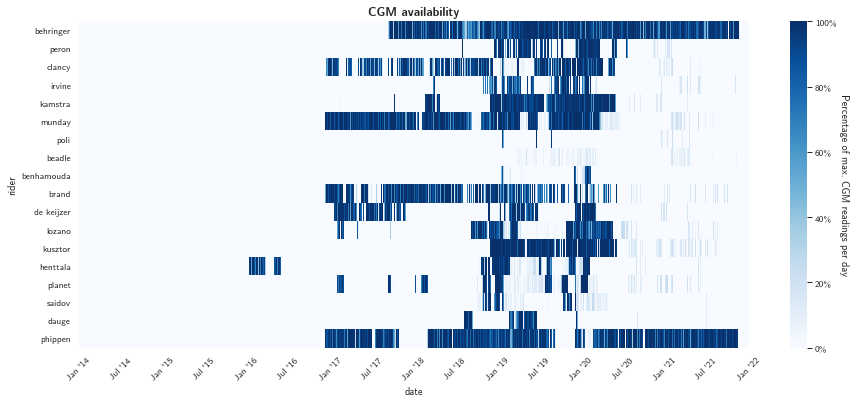

In [15]:
ax = plot_availability(dc_avail, rot_months=45, itv_months=6)
plt.title('CGM availability', fontweight='bold', fontsize=12)
savefig('availability/glucose_availability_all', yticks=ax)

In [16]:
pro_list = pro.set_index('RIDER').stack().replace({'-':'np.nan'}).reset_index().rename(columns={'level_1':'year', 0:'pro'})
pro_list['year'] = pro_list['year'].astype(int)
pro_list.columns = pd.MultiIndex.from_product([pro_list.columns, ['']])
pro_list

RIDER  year     pro
                       
0       1  2014  np.nan
1       1  2015  np.nan
2       1  2016  np.nan
3       1  2017     DEV
4       1  2018     DEV
..    ...   ...     ...
139    18  2017     DEV
140    18  2018     DEV
141    18  2019     DEV
142    18  2020     DEV
143    18  2021     PRO

[144 rows x 3 columns]

In [17]:
# note that this is not an accurate list of pro's but is just used for demonstration
# (does not take into account start and end of the season)
tp_agg['year'] = tp_agg['date'].dt.year
tp_agg = pd.merge(tp_agg, pro_list, on=['RIDER', 'year'], how='left')
tp_agg = tp_agg.drop([('year')], axis=1)
tp_agg

/local/home/evanweenen/.local/lib/python3.7/site-packages/pandas/core/generic.py:4150: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


RIDER       date            TIME                       \
                       timestamp_count  local_timestamp_min   
0         1 2016-11-22          7446.0  2016-11-22 12:58:57   
1         1 2016-11-23          7312.0  2016-11-23 14:29:13   
2         1 2016-11-24          6285.0  2016-11-24 09:53:38   
3         1 2016-11-26          7445.0  2016-11-26 10:00:35   
4         1 2016-12-06         11222.0  2016-12-06 09:11:34   
...     ...        ...             ...                  ...   
30207    18 2021-11-18          4767.0  2021-11-18 14:58:17   
30208    18 2021-11-25         10912.0  2021-11-25 09:50:57   
30209    18 2021-11-26          8737.0  2021-11-26 10:12:34   
30210    18 2021-11-27         18222.0  2021-11-27 09:31:58   
30211    18 2021-11-28         14549.0  2021-11-28 10:02:22   

                           CALENDAR                                   \
       local_timestamp_max     race travel race_3d_mean race_7d_mean   
0      2016-11-22 15:15:40    False   True          0.0          0.0   
1      2016-11-23 16:35:14    False  False          0.0          0.0   
2      2016-11-24 16:56:38    False  False          0.0          0.0   
3      2016-11-26 12:12:52    False  False          0.0          0.0   
4      2016-12-06 16:11:38    False  False          0.0          0.0   
...                    ...      ...    ...          ...          ...   
30207  2021-11-18 16:19:15    False  False          0.0          0.0   
30208  2021-11-25 12:54:14    False  False          0.0          0.0   
30209  2021-11-26 12:39:08    False  False          0.0          0.0   
30210  2021-11-27 14:36:43    False  False          0.0          0.0   
30211  2021-11-28 14:21:57    False  False          0.0          0.0   

                     ...             LOC                                  \
      travel_3d_any  ... distance_up_min distance_up_max distance_up_sum   
0              True  ...            3.02        60211.87    1.615842e+08   
1              True  ...            0.00        66126.45    2.109715e+08   
2              True  ...            3.43        34317.18    6.765391e+07   
3             False  ...            1.10        65340.95    1.908990e+08   
4             False  ...            0.00        64799.24    2.761122e+08   
...             ...  ...             ...             ...             ...   
30207         False  ...            0.00        29709.74    5.001524e+07   
30208         False  ...            0.00        80574.10    2.989028e+08   
30209         False  ...            0.00        62597.98    1.875908e+08   
30210         False  ...            0.00       130010.95    7.310406e+08   
30211         False  ...            3.57       109086.89    5.640191e+08   

                                                                            \
      distance_up_energy distance_up_peaks distance_up_rms distance_up_iqr   
0           6.454802e+12               0.0    29442.856294             NaN   
1           9.441041e+12               0.0    35932.864834             NaN   
2           1.379010e+12               0.0    14812.591736             NaN   
3           8.218843e+12               0.0    33225.612828             NaN   
4           1.133536e+13               1.0    31782.096599             NaN   
...                  ...               ...             ...             ...   
30207       1.099600e+12               0.0    15187.800246             NaN   
30208       1.488329e+13               0.0    36931.529437             NaN   
30209       8.146286e+12               0.0    30535.051494             NaN   
30210       6.144018e+13               0.0    58066.844495             NaN   
30211       4.316849e+13               0.0    54471.190338             NaN   

                                              pro  
      acceleration_iqr elevation_gain_iqr          
0                  NaN                NaN  np.nan  
1                  NaN                NaN  np.nan  
2                  NaN               

In [18]:
tp_avail = tp_agg.pivot(index='RIDER', columns='date', values='pro')
tp_avail = tp_avail.replace({'PRO':2, 'DEV':1, 'np.nan':np.nan})

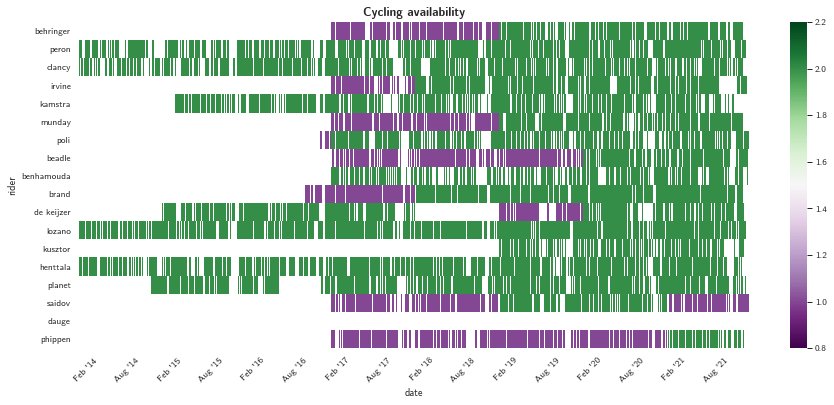

In [19]:
ax = plot_availability(tp_avail, cmap='PRGn', vmin=0.8, vmax=2.2, 
                       rot_months=45, itv_months=6, plot_colorbar=False)
plt.title('Cycling availability', fontweight='bold', fontsize=12)
savefig('availability/glucose_availability_all', dtype='TrainingPeaks', yticks=ax)

In [20]:
tp_agg = tp_agg.drop('pro', axis=1)

/local/home/evanweenen/.local/lib/python3.7/site-packages/pandas/core/generic.py:4150: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


In [21]:
print("Data available: ")
print("TrainingPeaks (agg): N =", len(tp_agg.RIDER.unique()), "; D =", len(tp_agg))
print("Dexcom (agg): N =", len(dc_agg.RIDER.unique()), "; D =", len(dc_agg.dropna(subset=['glucose_mean_day'])))
print("Dexcom: N =", len(dc.RIDER.unique()), "; D =", len(dc.dropna(subset=['Glucose Value (mg/dL)'])[['RIDER', 'date']].drop_duplicates()))

Data available: 
TrainingPeaks (agg): N = 18 ; D = 30212
Dexcom (agg): N = 18 ; D = 11785
Dexcom: N = 18 ; D = 11785


Redefine day to be between 06am and 06am

In [22]:
dc_agg = dc_agg.set_index(['RIDER', 'date'])

cols_sleep = dc_agg.columns[dc_agg.columns.str.endswith('sleep')]
dc_agg[cols_sleep] = dc_agg.groupby('RIDER')[cols_sleep].apply(lambda x: x.shift(-1))

dc_agg = dc_agg.dropna(subset=['glucose_mean_'+i for i in ('exercise', 'recovery', 'sleep', 'wake')], how='all')
dc_agg = dc_agg.reset_index()

# note that everything ending with _day still has the old day definition in there 
# (so we should actually be dropping this as well)

dc['date_6h'] = pd.to_datetime((dc.local_timestamp - pd.to_timedelta('6h')).dt.date)

In [23]:
print("Data available: ")
print("TrainingPeaks (agg): N =", len(tp_agg.RIDER.unique()), "; D =", len(tp_agg))
print("Dexcom (agg): N =", len(dc_agg.RIDER.unique()), "; D =", len(dc_agg))
print("Dexcom: N =", len(dc.RIDER.unique()), "; D =", len(dc.dropna(subset=['Glucose Value (mg/dL)'])[['RIDER', 'date_6h']].drop_duplicates()))

Data available: 
TrainingPeaks (agg): N = 18 ; D = 30212
Dexcom (agg): N = 18 ; D = 11810
Dexcom: N = 18 ; D = 11808


Note: the difference between dc_agg and dc lies in the fact that there can be also glucose measurements in the sleep period that is now moved to the next day. (For instance, there is cgm data during a cycling session that took place between 5am and 6am.) For the dc data, now this cycling session is not accounted to this day but still to the previous day. For the dc_agg data, this is done correctly and it is taken into account for the next day. As we only use the dc data for calculating the statistics on a rider-level, we can just ignore the fact that this happens.

### Select data

Select riders that were pro in 2019

In [24]:
ATHLETES = pro.loc[pro['2019'] == 'PRO', 'RIDER'].to_list()

In [25]:
info = info[info.RIDER.isin(ATHLETES)].set_index('RIDER')
season = season[season.RIDER.isin(ATHLETES)].set_index('RIDER')

In [26]:
print("Data available: ")
print("TrainingPeaks (agg): N =", len(tp_agg[tp_agg.RIDER.isin(ATHLETES)].RIDER.unique()), 
      "; D =", len(tp_agg[tp_agg.RIDER.isin(ATHLETES)]))
print("Dexcom (agg): N =", len(dc_agg[dc_agg.RIDER.isin(ATHLETES)].RIDER.unique()), 
      "; D =", len(dc_agg[dc_agg.RIDER.isin(ATHLETES)]))
print("Dexcom: N =", len(dc[dc.RIDER.isin(ATHLETES)].RIDER.unique()), 
      "; D =", len(dc[dc.RIDER.isin(ATHLETES)].dropna(subset=['Glucose Value (mg/dL)'])[['RIDER', 'date_6h']].drop_duplicates()))

Data available: 
TrainingPeaks (agg): N = 14 ; D = 25116
Dexcom (agg): N = 14 ; D = 9248
Dexcom: N = 14 ; D = 9246


Select beginning and end of the training season in 2019

In [27]:
season = season['2019']

season['start'] = pd.to_datetime(season['start'])
season['end'] = pd.to_datetime(season['end'])

season_list = season.apply(lambda x: pd.date_range(x[0], x[1], freq='1D'), axis=1)\
    .apply(pd.Series).stack().reset_index().drop('level_1', axis=1).rename(columns={0:'date'})
season_list

RIDER       date
0         1 2018-11-05
1         1 2018-11-06
2         1 2018-11-07
3         1 2018-11-08
4         1 2018-11-09
...     ...        ...
4642     16 2019-09-25
4643     16 2019-09-26
4644     16 2019-09-27
4645     16 2019-09-28
4646     16 2019-09-29

[4647 rows x 2 columns]

In [28]:
tp_agg = pd.merge(tp_agg, season_list, how='inner', on=['RIDER', 'date'])
tp_agg

/local/home/evanweenen/.local/lib/python3.7/site-packages/pandas/core/reshape/merge.py:648: UserWarning: merging between different levels can give an unintended result (2 levels on the left,1 on the right)
  warnings.warn(msg, UserWarning)


RIDER       date            TIME                       \
                      timestamp_count  local_timestamp_min   
0        1 2018-11-05          7767.0  2018-11-05 09:34:13   
1        1 2018-11-06          8065.0  2018-11-06 09:24:16   
2        1 2018-11-07         11349.0  2018-11-07 10:05:29   
3        1 2018-11-08          7649.0  2018-11-08 09:52:38   
4        1 2018-11-09         11297.0  2018-11-09 11:14:27   
...    ...        ...             ...                  ...   
3823    16 2019-09-22          7113.0  2019-09-22 10:00:18   
3824    16 2019-09-24          6530.0  2019-09-24 15:39:16   
3825    16 2019-09-27          7462.0  2019-09-27 14:50:03   
3826    16 2019-09-28          3157.0  2019-09-28 07:48:34   
3827    16 2019-09-29          3188.0  2019-09-29 08:00:16   

                          CALENDAR                                   \
      local_timestamp_max     race travel race_3d_mean race_7d_mean   
0     2018-11-05 11:44:12    False  False          0.0         0.00   
1     2018-11-06 11:51:24    False  False          0.0         0.00   
2     2018-11-07 14:45:37    False  False          0.0         0.00   
3     2018-11-08 12:00:51    False  False          0.0         0.00   
4     2018-11-09 14:30:32    False  False          0.0         0.00   
...                   ...      ...    ...          ...          ...   
3823  2019-09-22 11:58:50     True  False          1.0         1.00   
3824  2019-09-24 17:33:43    False   True          0.5         0.75   
3825  2019-09-27 16:56:26    False  False          0.0         0.50   
3826  2019-09-28 11:16:50    False  False          0.0         0.25   
3827  2019-09-29 10:33:36    False  False          0.0         0.00   

                    ...             LOC                                  \
     travel_3d_any  ... distance_up_std distance_up_min distance_up_max   
0            False  ...    18656.226401            3.59        65349.97   
1            False  ...    19199.276476            2.92        66307.17   
2            False  ...    19563.878883            1.51        62788.58   
3            False  ...    15849.203522            5.32        58178.67   
4            False  ...    26199.242609            2.23        88539.50   
...            ...  ...             ...             ...             ...   
3823         False  ...    26055.541836            0.00        89795.72   
3824          True  ...    14619.302426            0.00        49505.13   
3825         False  ...    17700.026352            0.00        58930.55   
3826         False  ...     3065.843556            0.00        11575.00   
3827         False  ...     5300.419197            0.00        17869.29   

                                                                           \
     distance_up_sum distance_up_energy distance_up_peaks distance_up_rms   
0       1.944342e+08       8.506042e+12               0.0    33093.073022   
1       2.071938e+08       9.171050e+12               0.0    33721.534886   
2       2.167544e+08       8.801185e+12               0.0    27847.856015   
3       1.592105e+08       5.851699e+12               0.0    27659.139890   
4       3.576181e+08       2.085233e+13               0.0    42963.110579   
...              ...                ...               ...             ...   
3823    2.669970e+08       1.614758e+13               0.0    47646.102977   
3824    1.409365e+08       4.623329e+12               0.0    26608.525456   
3825    1.924826e+08       7.640674e+12              14.0    31999.133272   
3826    1.519483e+07       1.040321e+11               2.0     5740.457015   
3827    2.324267e+07       2.624825e+11               1.0     9073.837953   

                                                          
     distance_up_iqr acceleration_iqr elevation_gain_iqr  
0                NaN              NaN                NaN  
1                NaN              NaN                NaN  
2                NaN              NaN                NaN  
3

In [29]:
dc_agg = pd.merge(dc_agg, season_list, how='inner', on=['RIDER', 'date'])
dc_agg

RIDER       date  time_in_hypo_exercise  time_in_hypoL2_exercise  \
0         1 2018-11-05                   10.0                      4.0   
1         1 2018-11-06                    1.0                      0.0   
2         1 2018-11-07                   27.0                     10.0   
3         1 2018-11-08                   10.0                      1.0   
4         1 2018-11-09                    3.0                      0.0   
...     ...        ...                    ...                      ...   
3066     16 2019-04-25                    2.0                      0.0   
3067     16 2019-04-26                    0.0                      0.0   
3068     16 2019-04-27                    0.0                      0.0   
3069     16 2019-04-30                    0.0                      0.0   
3070     16 2019-08-12                    0.0                      0.0   

      time_in_hypoL1_exercise  time_in_target_exercise  \
0                         6.0                      2.0   
1                         1.0                     19.0   
2                        17.0                     25.0   
3                         9.0                     16.0   
4                         3.0                     32.0   
...                       ...                      ...   
3066                      2.0                     42.0   
3067                      0.0                     22.0   
3068                      0.0                     11.0   
3069                      0.0                      0.0   
3070                      0.0                     24.0   

      time_in_hyper_exercise  time_in_hyperL1_exercise  \
0                        0.0                       0.0   
1                        0.0                       0.0   
2                        5.0                       5.0   
3                        0.0                       0.0   
4                        5.0                       5.0   
...                      ...                       ...   
3066                     1.0                       1.0   
3067                     0.0                       0.0   
3068                     9.0                       9.0   
3069                    25.0                      23.0   
3070                     0.0                       0.0   

      time_in_hyperL2_exercise  glucose_mean_exercise  ...  glucose_std_day  \
0                          0.0              59.500000  ...        56.705728   
1                          0.0             128.550000  ...        35.423009   
2                          0.0              85.333333  ...        50.113354   
3                          0.0              73.115385  ...        43.911998   
4                          0.0             110.375000  ...        51.618469   
...                        ...                    ...  ...              ...   
3066                       0.0             110.266667  ...        29.171995   
3067                       0.0             129.545455  ...        19.308837   
3068                       0.0             169.050000  ...        38.900667   
3069                       2.0             239.480000  ...         8.651901   
3070                       0.0             115.166667  ...        17.464664   

      glucose_cv_day  glucose_rate_day  completeness_day  count_day  LBGI_day  \
0           0.441880        128.328302          0.920139        265  2.419600   
1           0.334281        105.967626          0.965278        278  2.871435   
2           0.498897        100.448276          0.906250        261  7.604452   
3           0.378438        116.034722          1.000000        288  2.116019   
4           0.492795        104.746377          0.958333        276  5.616227   
...              ...               ...               ...        ...       ...   
3066        0.264729        110.195652          0.159722         46  0.266075   
3067        0.149051        129.545455          0.076389         22  0.002101   
3068        0.233604        166.523810       

In [30]:
dc = pd.merge(dc, season_list, how='inner', left_on=['RIDER', 'date_6h'], right_on=['RIDER', 'date'])
dc = dc.drop('date_y', axis=1)
dc = dc.rename(columns={'date_x':'date'})
dc

RIDER           timestamp  Glucose Value (mg/dL)     local_timestamp  \
0            1 2018-11-05 05:00:00                   73.0 2018-11-05 06:00:00   
1            1 2018-11-05 05:05:00                   73.0 2018-11-05 06:05:00   
2            1 2018-11-05 05:10:00                   73.0 2018-11-05 06:10:00   
3            1 2018-11-05 05:15:00                   73.0 2018-11-05 06:15:00   
4            1 2018-11-05 05:20:00                   73.0 2018-11-05 06:20:00   
...        ...                 ...                    ...                 ...   
1338067     16 2019-09-30 09:35:00                    NaN 2019-09-30 05:35:00   
1338068     16 2019-09-30 09:40:00                    NaN 2019-09-30 05:40:00   
1338069     16 2019-09-30 09:45:00                    NaN 2019-09-30 05:45:00   
1338070     16 2019-09-30 09:50:00                    NaN 2019-09-30 05:50:00   
1338071     16 2019-09-30 09:55:00                    NaN 2019-09-30 05:55:00   

         exercise  recovery   wake  sleep   race  travel       date    date_6h  
0           False     False   True  False  False   False 2018-11-05 2018-11-05  
1           False     False   True  False  False   False 2018-11-05 2018-11-05  
2           False     False   True  False  False   False 2018-11-05 2018-11-05  
3           False     False   True  False  False   False 2018-11-05 2018-11-05  
4           False     False   True  False  False   False 2018-11-05 2018-11-05  
...           ...       ...    ...    ...    ...     ...        ...        ...  
1338067     False     False  False   True  False   False 2019-09-30 2019-09-29  
1338068     False     False  False   True  False   False 2019-09-30 2019-09-29  
1338069     False     False  False   True  False   False 2019-09-30 2019-09-29  
1338070     False     False  False   True  False   False 2019-09-30 2019-09-29  
1338071     False     False  False   True  False   False 2019-09-30 2019-09-29  

[1338072 rows x 12 columns]

In [31]:
print("Data available: ")
print("TrainingPeaks (agg): N =", len(tp_agg.RIDER.unique()), "; D =", len(tp_agg))
print("Dexcom (agg): N =", len(dc_agg.RIDER.unique()), "; D =", len(dc_agg))
print("Dexcom: N =", len(dc.RIDER.unique()), "; D =", len(dc.dropna(subset=['Glucose Value (mg/dL)'])[['RIDER', 'date_6h']].drop_duplicates()))

Data available: 
TrainingPeaks (agg): N = 14 ; D = 3828
Dexcom (agg): N = 14 ; D = 3071
Dexcom: N = 14 ; D = 3071


#### Glucose completeness

In [32]:
completeness = pd.read_csv(DATA_PATH+'agg/dexcom_completeness_6h.csv', index_col=0)
completeness = completeness.rename(columns={'0':'completeness'})
completeness['date_6h'] = pd.to_datetime(completeness['date_6h'])
completeness

RIDER    date_6h  completeness
0          1 2013-12-31           0.0
1          1 2014-01-01           0.0
2          1 2014-01-02           0.0
3          1 2014-01-03           0.0
4          1 2014-01-04           0.0
...      ...        ...           ...
52609     18 2021-12-27           0.0
52610     18 2021-12-28           0.0
52611     18 2021-12-29           0.0
52612     18 2021-12-30           0.0
52613     18 2021-12-31           0.0

[52614 rows x 3 columns]

In [33]:
dc_agg = pd.merge(dc_agg, completeness, left_on=['RIDER', 'date'], right_on=['RIDER', 'date_6h'], how='left')
dc_agg = dc_agg.drop('date_6h', axis=1)

In [34]:
dc = pd.merge(dc, completeness, on=['RIDER', 'date_6h'], how='left')

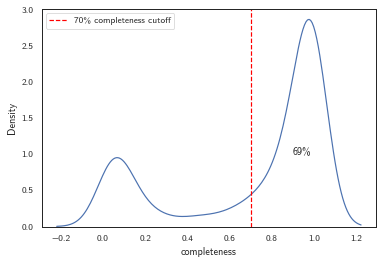

In [35]:
sns.kdeplot(data=dc_agg, x='completeness')
plt.axvline(0.7, ls='--', color='red', label='70% completeness cutoff')
plt.text(0.9,1, '{:.0f}%'.format((dc_agg['completeness'] >= 0.7).sum()/dc_agg['completeness'].count()*100))
plt.legend()
plt.show()

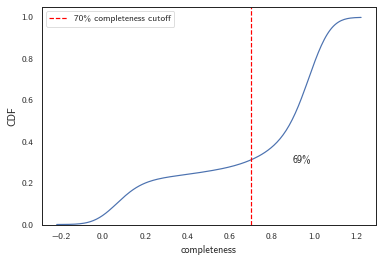

In [36]:
sns.kdeplot(data=dc_agg, x='completeness', cumulative=True)
plt.axvline(0.7, ls='--', color='red', label='70% completeness cutoff')
plt.text(0.9,0.3, '{:.0f}%'.format((dc_agg['completeness'] >= 0.7).sum()/dc_agg['completeness'].count()*100))
plt.legend()
plt.ylabel('CDF')
plt.savefig(SAVE_PATH+'completeness_cutoff_cdf.png', dpi=300, bbox_inches='tight')
plt.show()

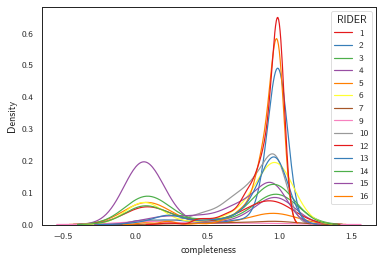

In [37]:
sns.kdeplot(data=dc_agg, x='completeness', hue='RIDER', palette='Set1') ; plt.show()

Calendar with glucose availability

In [38]:
dc_avail = pd.merge(dc_agg, season_list, how='right', on=['RIDER', 'date'])\
    .pivot(index='RIDER', columns='date', values='completeness')

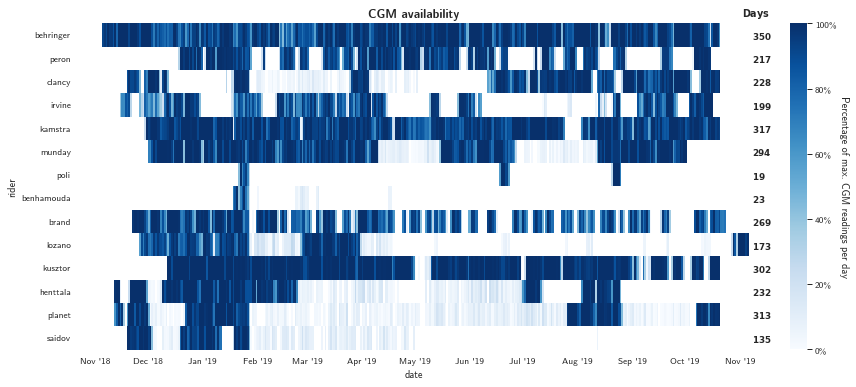

In [39]:
ax = plot_availability(dc_avail, plot_total='count')
plt.title('CGM availability', fontweight='bold', fontsize=12)
savefig('availability/glucose_availability', yticks=ax)

Select data with glucose completeness >= 70% (on a day from 6am to 6am) and remove nans from dexcom data

In [40]:
dc.loc[dc['completeness'] < 0.7, 'Glucose Value (mg/dL)'] = np.nan
dc = dc.dropna(subset=['Glucose Value (mg/dL)'])

In [41]:
dc_agg = dc_agg[dc_agg['completeness'] >= 0.7]

In [42]:
print("Data available: ")
print("TrainingPeaks (agg): N =", len(tp_agg.RIDER.unique()), "; D =", len(tp_agg))
print("Dexcom (agg): N =", len(dc_agg.RIDER.unique()), "; D =", len(dc_agg))
print("Dexcom: N =", len(dc.RIDER.unique()), "; D =", len(dc[['RIDER', 'date_6h']].drop_duplicates()))

Data available: 
TrainingPeaks (agg): N = 14 ; D = 3828
Dexcom (agg): N = 14 ; D = 2133
Dexcom: N = 14 ; D = 2133


Select participants with 14 or more days of data

In [43]:
mask = dc_agg.groupby('RIDER')['date'].nunique() >= 14
ATHLETES = mask[mask].index

info = info.loc[ATHLETES]
season_list = season_list[season_list.RIDER.isin(ATHLETES)]

tp_agg = tp_agg[tp_agg.RIDER.isin(ATHLETES)]
dc_agg = dc_agg[dc_agg.RIDER.isin(ATHLETES)]
dc = dc[dc.RIDER.isin(ATHLETES)]

In [44]:
print("Data available: ")
print("TrainingPeaks (agg): N =", len(tp_agg.RIDER.unique()), "; D =", len(tp_agg))
print("Dexcom (agg): N =", len(dc_agg.RIDER.unique()), "; D =", len(dc_agg))
print("Dexcom: N =", len(dc.RIDER.unique()), "; D =", len(dc[['RIDER', 'date_6h']].drop_duplicates()))

Data available: 
TrainingPeaks (agg): N = 12 ; D = 3370
Dexcom (agg): N = 12 ; D = 2115
Dexcom: N = 12 ; D = 2115


**Give participants a new ID (so that it is not confusing for the paper)**

In [45]:
new_mapping = {1:1,
               2:2,
               3:3, 
               4:4, 
               5:5, 
               6:6, 
               7:7, 
               9:8, 
               10:9, 
               12:10, 
               13:11, 
               14:12, 
               15:13, 
               16:14}

In [46]:
ATHLETES = [*map(new_mapping.get, ATHLETES)]
info.index = info.index.map(new_mapping)
season.index = season.index.map(new_mapping)
season_list.RIDER = season_list.RIDER.map(new_mapping)
tp_agg.RIDER = tp_agg.RIDER.map(new_mapping)
dc_agg.RIDER = dc_agg.RIDER.map(new_mapping)
dc.RIDER = dc.RIDER.map(new_mapping)
rider_mapping_inv = {new_mapping[k]:v for k,v in rider_mapping_inv.items() if k in new_mapping.keys()}

/local/home/evanweenen/.local/lib/python3.7/site-packages/pandas/core/generic.py:5489: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [47]:
def savefig(path, i='', dtype='Dexcom', legend=None, title=None, xticks=None, yticks=None, **titlekwargs):
    if title is not None:
        plt.title(r'$\bf{Cyclist}$ '+r'$\bf{:d}$ - '.format(i)+title, **titlekwargs)
    if legend is not None:
        for text in legend:
            text.set_fontsize(6)
    
    plt.savefig(f'{SAVE_PATH}{dtype}/{path}_{i}.pdf', bbox_inches='tight')
    plt.savefig(f'{SAVE_PATH}{dtype}/{path}_{i}.png', dpi=300, bbox_inches='tight')
    
    if title is not None:
        plt.title(r'$\bf{:s}$ '.format(rider_mapping_inv[i])+title, **titlekwargs)
    if legend is not None:
        for leg in legend:
            text = leg.get_text().split()
            leg.set_text(rider_mapping_inv[int(text[0])]+' '+' '.join(text[1:]))
    if xticks is not None:
        xticks.set_xticklabels([rider_mapping_inv[int(j.get_text())] for j in xticks.get_xticklabels()], rotation=90)
    if yticks is not None:
        yticks.set_yticklabels([rider_mapping_inv[int(j.get_text())] for j in yticks.get_yticklabels()], rotation=0)
    
    if title is not None or legend is not None or xticks is not None or yticks is not None:
        plt.savefig(f'{SAVE_PATH}{dtype}/{path}_NAME_{i}.pdf', bbox_inches='tight')
        plt.savefig(f'{SAVE_PATH}{dtype}/{path}_NAME_{i}.png', dpi=600, bbox_inches='tight')
    plt.show()
    plt.close()

In [48]:
dc_avail = pd.merge(dc_agg, season_list, how='right', on=['RIDER', 'date'])\
    .pivot(index='RIDER', columns='date', values='completeness')

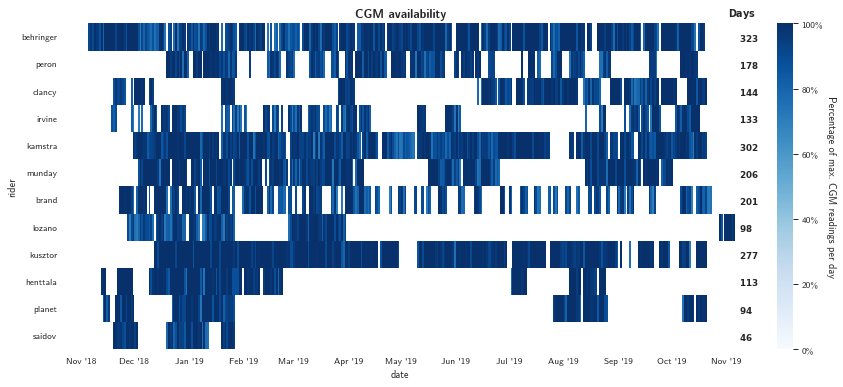

In [49]:
ax = plot_availability(dc_avail, plot_total='count')
plt.title('CGM availability', fontweight='bold', fontsize=12)
savefig('availability/glucose_availability_selectcomp', yticks=ax)

## Descriptives Dexcom

### Glucose distribution (histograms)

All data

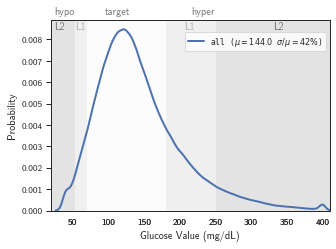

In [50]:
fig, ax0 = plt.subplots(figsize=(5, 3.5))
ax0 = plot_glucose_levels(ax0, color=False)
ax = ax0.twinx()
sns.kdeplot(dc[COL], ax=ax, linewidth=2,
	label=r'all ($\mu = {:.1f}$ $\sigma/\mu = {:.0f}\%$)'\
	.format(dc[COL].mean(), dc[COL].std()/dc[COL].mean()*100))
plot_hist_glucose_settings(ax, ax0, COL)
ax.set_xlabel(COL)
savefig(path='hist/hist_glucose')

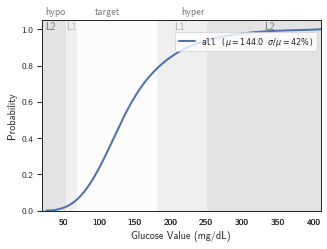

In [51]:
fig, ax0 = plt.subplots(figsize=(5, 3.5))
ax0 = plot_glucose_levels(ax0, color=False)
ax = ax0.twinx()
sns.kdeplot(dc[COL], ax=ax, cumulative=True, linewidth=2,
	label=r'all ($\mu = {:.1f}$ $\sigma/\mu = {:.0f}\%$)'\
	.format(dc[COL].mean(), dc[COL].std()/dc[COL].mean()*100))
plot_hist_glucose_settings(ax, ax0, COL)
ax.set_xlabel(COL)
savefig(path='cdf/cdf_glucose')

All, hue: sections

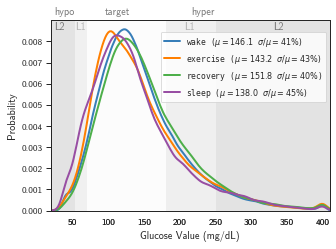

In [52]:
fig, ax0 = plt.subplots(figsize=(5, 3.5))
ax0 = plot_glucose_levels(ax0, color=False)
ax = ax0.twinx()
for k, sec in enumerate(SECTIONS):
	sns.kdeplot(dc[dc[sec]][COL], ax=ax, linewidth=2, color=color_sec[sec],
		label=sec+r' ($\mu = {:.1f}$ $\sigma/\mu = {:.0f}\%$)'.format(dc[dc[sec]][COL].mean(), dc[dc[sec]][COL].std()/dc[dc[sec]][COL].mean()*100))
plot_hist_glucose_settings(ax, ax0, COL)
savefig(path='hist/hist_glucose_sec')

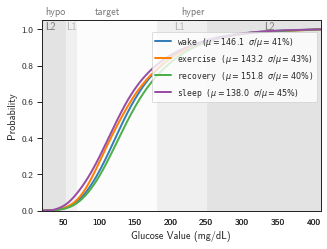

In [53]:
fig, ax0 = plt.subplots(figsize=(5, 3.5))
ax0 = plot_glucose_levels(ax0, color=False)
ax = ax0.twinx()
for k, sec in enumerate(SECTIONS):
	sns.kdeplot(dc[dc[sec]][COL], ax=ax, cumulative=True, linewidth=2, color=color_sec[sec],
		label=sec+r' ($\mu = {:.1f}$ $\sigma/\mu = {:.0f}\%$)'.format(dc[dc[sec]][COL].mean(), dc[dc[sec]][COL].std()/dc[dc[sec]][COL].mean()*100))
plot_hist_glucose_settings(ax, ax0, COL)
savefig(path='cdf/cdf_glucose_sec')

Individual athletes, hue: sections

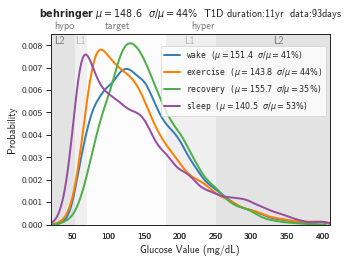

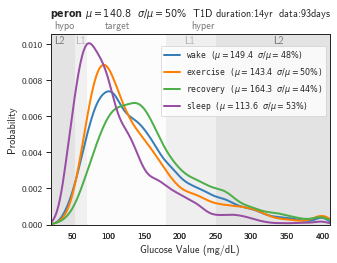

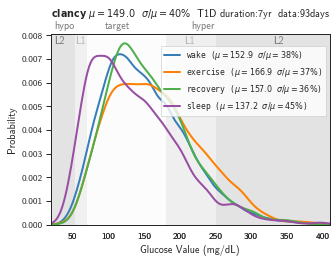

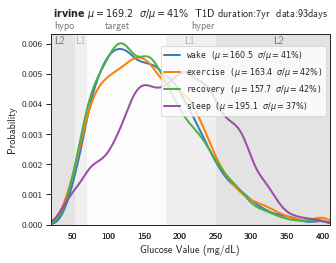

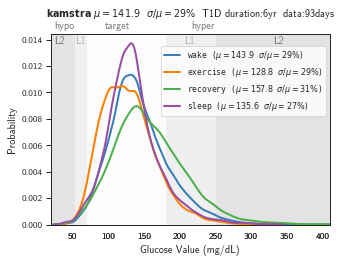

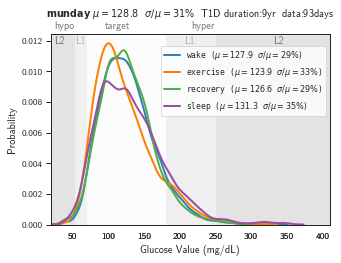

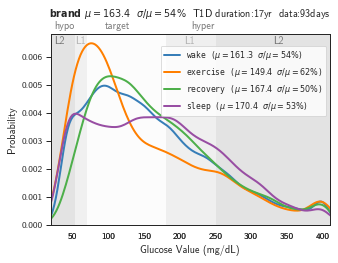

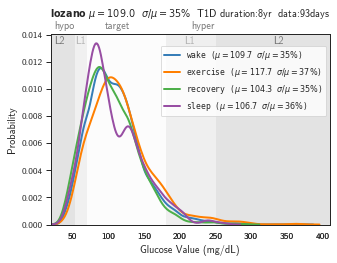

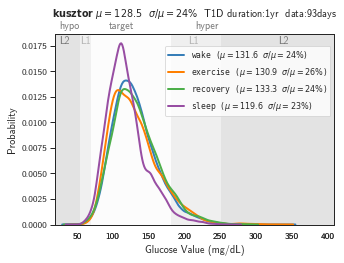

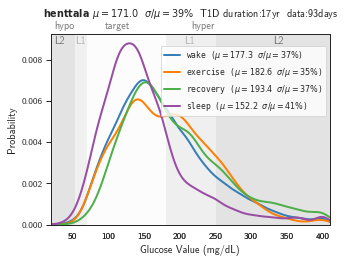

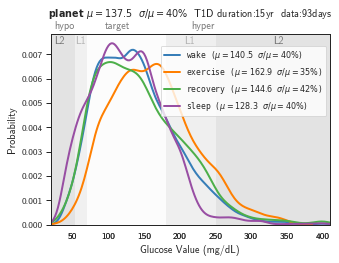

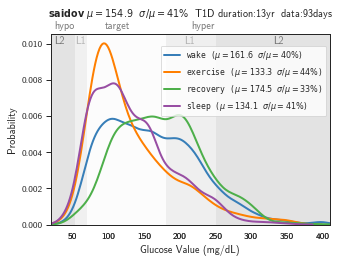

In [54]:
for i in ATHLETES:
	fig, ax0 = plt.subplots(figsize=(5, 3.5))
	ax0 = plot_glucose_levels(ax0, color=False)
	ax = ax0.twinx()
	
	for k, sec in enumerate(SECTIONS):
		sns.kdeplot(dc.loc[dc[sec] & (dc.RIDER == i), COL], ax=ax, linewidth=2, color=color_sec[sec],
			label=sec+r' ($\mu = {:.1f}$ $\sigma/\mu = {:.0f}\%$)'\
			.format(dc.loc[dc[sec] & (dc.RIDER == i), COL].mean(), 
					dc.loc[dc[sec] & (dc.RIDER == i), COL].std()/dc.loc[dc[sec] & (dc.RIDER == i), COL].mean()*100))
	plot_hist_glucose_settings(ax, ax0, COL)
	title = r'$\mu = {:.1f}$  $\sigma/\mu = {:.0f}\%$  T1D duration:{:.0f}yr  data:{:.0f}days'\
		.format(dc[dc.RIDER == i][COL].mean(),
				dc[dc.RIDER == i][COL].std()/dc[dc.RIDER == i][COL].mean()*100,
				info.loc[i, 'diabetes_duration'],
				len(dc_agg.loc[i]))
	savefig(path='hist/hist_glucose_rider', i=i, title=title, y=1.06)

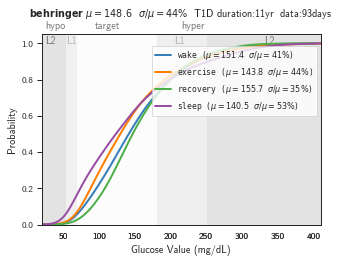

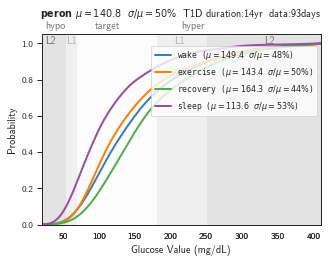

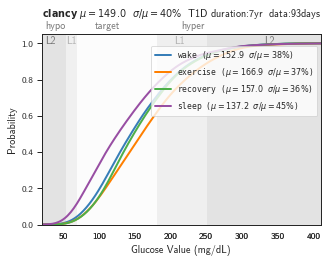

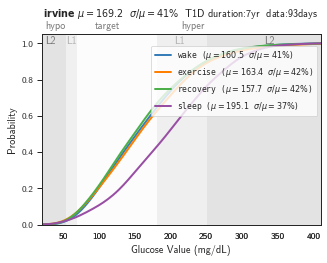

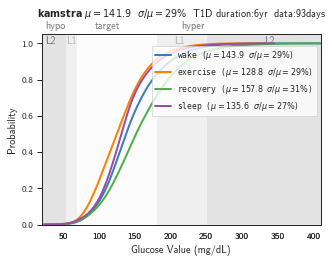

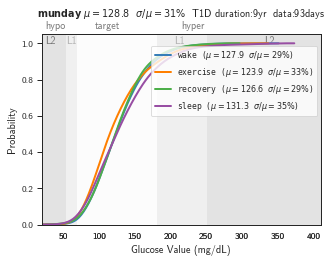

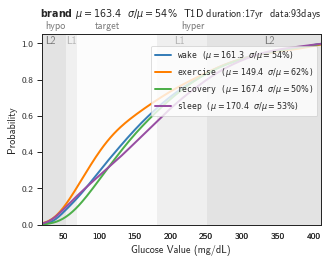

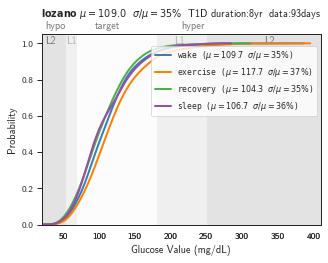

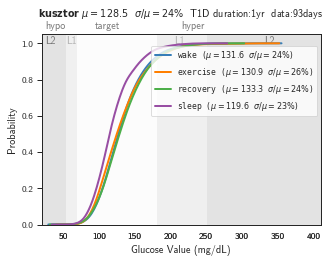

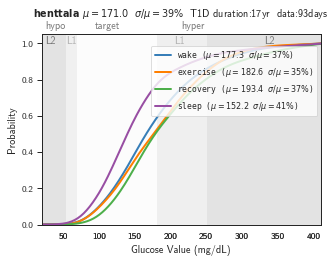

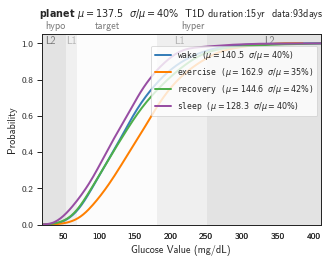

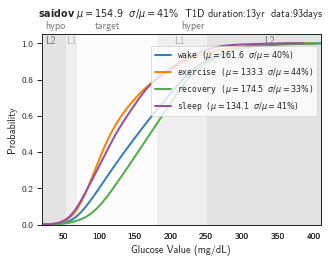

In [55]:
for i in ATHLETES:
	fig, ax0 = plt.subplots(figsize=(5, 3.5))
	ax0 = plot_glucose_levels(ax0, color=False)
	ax = ax0.twinx()
	
	for k, sec in enumerate(SECTIONS):
		sns.kdeplot(dc.loc[dc[sec] & (dc.RIDER == i), COL], ax=ax, cumulative=True, 
			linewidth=2, color=color_sec[sec],
			label=sec+r' ($\mu = {:.1f}$ $\sigma/\mu = {:.0f}\%$)'\
			.format(dc.loc[dc[sec] & (dc.RIDER == i), COL].mean(), 
					dc.loc[dc[sec] & (dc.RIDER == i), COL].std()/dc.loc[dc[sec] & (dc.RIDER == i), COL].mean()*100))
	plot_hist_glucose_settings(ax, ax0, COL)
	title = r'$\mu = {:.1f}$  $\sigma/\mu = {:.0f}\%$  T1D duration:{:.0f}yr  data:{:.0f}days'\
		.format(dc[dc.RIDER == i][COL].mean(),
				dc[dc.RIDER == i][COL].std()/dc[dc.RIDER == i][COL].mean()*100,
				info.loc[i, 'diabetes_duration'],
				len(dc_agg.loc[i]))
	savefig(path='cdf/cdf_glucose_rider', i=i, title=title, y=1.06)

All, hue: athletes

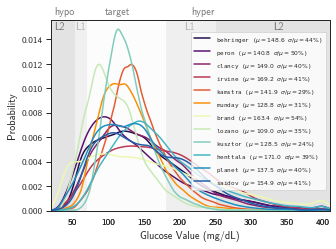

In [56]:
fig, ax0 = plt.subplots(figsize=(5, 3.5))
ax0 = plot_glucose_levels(ax0, color=False)
ax = ax0.twinx()
for c, i in enumerate(ATHLETES):
	sns.kdeplot(dc[dc.RIDER == i][COL], ax=ax, 
		linewidth=1.5, color=palette_ath[c], alpha=.8,
		label=str(i)+r' ($\mu = {:.1f}$ $\sigma/\mu = {:.0f}\%$)'\
		.format(dc[dc.RIDER == i][COL].mean(), 
				dc[dc.RIDER == i][COL].std()/dc[dc.RIDER == i][COL].mean()*100))
plot_hist_glucose_settings(ax, ax0, COL)
savefig(path='hist/hist_glucose_riders', legend=ax.get_legend().get_texts())

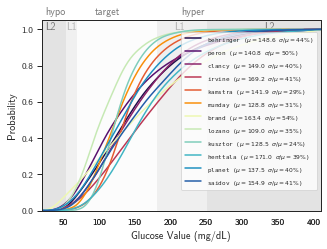

In [57]:
fig, ax0 = plt.subplots(figsize=(5, 3.5))
ax0 = plot_glucose_levels(ax0, color=False)
ax = ax0.twinx()
for c, i in enumerate(ATHLETES):
	sns.kdeplot(dc[dc.RIDER == i][COL], ax=ax, cumulative=True,
		linewidth=1.5, color=palette_ath[c], alpha=.8,
		label=str(i)+r' ($\mu = {:.1f}$ $\sigma/\mu = {:.0f}\%$)'\
		.format(dc[dc.RIDER == i][COL].mean(), 
				dc[dc.RIDER == i][COL].std()/dc[dc.RIDER == i][COL].mean()*100))
plot_hist_glucose_settings(ax, ax0, COL)
savefig(path='cdf/cdf_glucose_riders', legend=ax.get_legend().get_texts())

Sections individually, hue: athletes

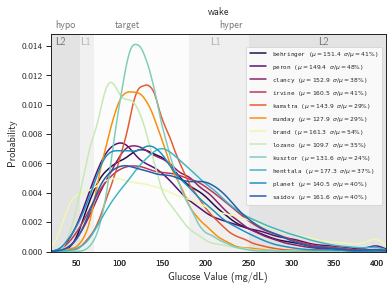

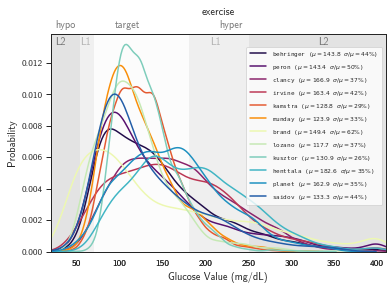

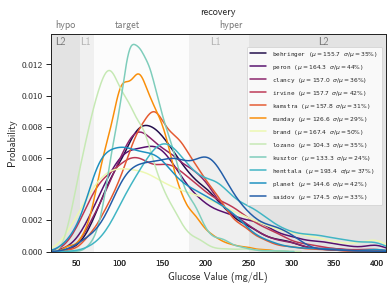

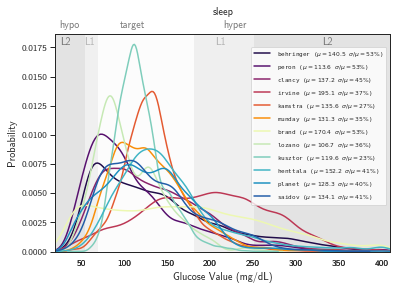

In [58]:
for k, sec in enumerate(SECTIONS):
	fig, ax0 = plt.subplots()
	ax0 = plot_glucose_levels(ax0, color=False)
	ax = ax0.twinx()
	for c, i in enumerate(ATHLETES):
		sns.kdeplot(dc.loc[dc[sec] & (dc.RIDER == i), COL], ax=ax, 
			linewidth=1.5, color=palette_ath[c], alpha=.8,
			label=str(i)+r' ($\mu = {:.1f}$ $\sigma/\mu = {:.0f}\%$)'\
			.format(dc.loc[dc[sec] & (dc.RIDER == i), COL].mean(), 
					dc.loc[dc[sec] & (dc.RIDER == i), COL].std()/dc.loc[dc[sec] & (dc.RIDER == i), COL].mean()*100))
	plot_hist_glucose_settings(ax, ax0, COL)
	plt.title(sec, y=1.06)
	savefig(path='hist/hist_glucose_sec', i=sec, legend=ax.get_legend().get_texts())

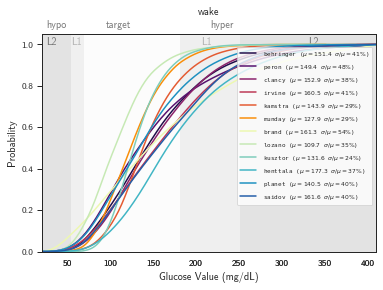

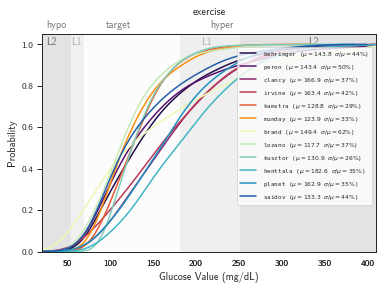

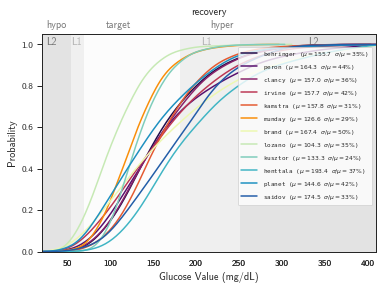

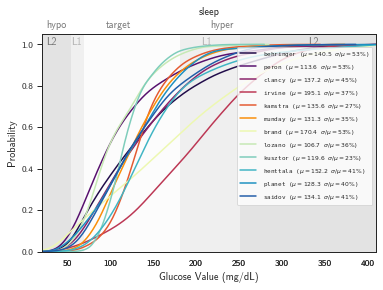

In [59]:
for k, sec in enumerate(SECTIONS):
	fig, ax0 = plt.subplots()
	ax0 = plot_glucose_levels(ax0, color=False)
	ax = ax0.twinx()
	for c, i in enumerate(ATHLETES):
		sns.kdeplot(dc.loc[dc[sec] & (dc.RIDER == i), COL], ax=ax, 
			cumulative=True, linewidth=1.5, color=palette_ath[c], alpha=.8,
			label=str(i)+r' ($\mu = {:.1f}$ $\sigma/\mu = {:.0f}\%$)'\
			.format(dc.loc[dc[sec] & (dc.RIDER == i), COL].mean(), 
					dc.loc[dc[sec] & (dc.RIDER == i), COL].std()/dc.loc[dc[sec] & (dc.RIDER == i), COL].mean()*100))
	plot_hist_glucose_settings(ax, ax0, COL)
	plt.title(sec, y=1.06)
	savefig(path='cdf/cdf_glucose_sec', i=sec, legend=ax.get_legend().get_texts())

**CONCLUSION** : Large differences among athletes

### Glucose time in level (barcharts)

In [60]:
def get_percinlevel(dc, col='Glucose Value (mg/dL)'):
	return {level: ((dc[col] >= lmin) & (dc[col] <= lmax)).sum() / len(dc)*100 for level, (lmin, lmax) in glucose_levels.items()}

In [61]:
legend_elements = [Patch(facecolor=c, edgecolor='white', hatch=h, label=l) \
					for c, l, h in zip(sns.diverging_palette(10, 10, s=0, n=5), 
									   ['L2 hyperglycemia', 'L1 hyperglycemia', 'Target glycemia', 'L1 hypoglycemia', 'L2 hypoglycemia'], 
									   ('///', '///', None, '\\\\\\', '\\\\\\'))] 

colors = [dict(zip(['h_neg', 'h_pos', 'l', 's'], [c[0]*360, c[0]*360, c[1]*100, c[2]*100])) \
			for c in [rgb_to_hls(*j) for j in color_sec.values()]]

All, hue: stages

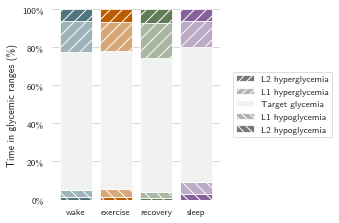

In [62]:
# TODO: now it is dominated by athletes that have the most data, 
# we should calculate it for riders individually and then average
fig, ax = plt.subplots(figsize=(3, 3.5))
for k, sec in enumerate(SECTIONS):
	pil = get_percinlevel(dc[dc[sec]])
	plot_bar(pil, x=k, colors=colors[k])

plt.yticks(np.arange(0, 101, 20), ['{}%'.format(j) for j in np.arange(0, 101, 20)])
plt.xticks(np.arange(len(SECTIONS)), SECTIONS)
plt.ylim((0,100))
plt.ylabel('Time in glycemic ranges (%)')

ax.legend(handles=legend_elements, loc='center right', bbox_to_anchor=(1.7, 0.5))
ax.yaxis.grid(True)
sns.despine(left=True, bottom=True, right=True)
savefig('time_in_zone/time_in_glucoselevel')

Individual athletes, hue: stages

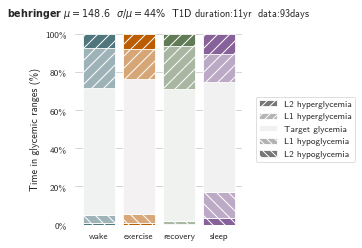

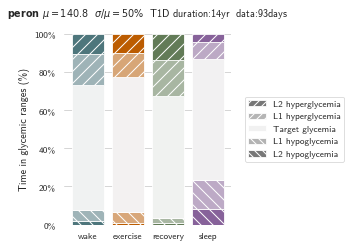

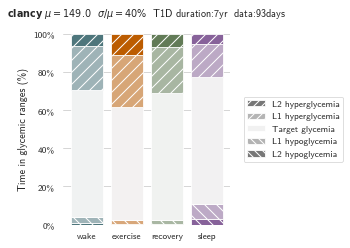

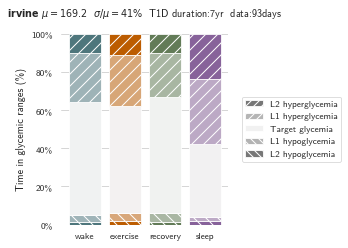

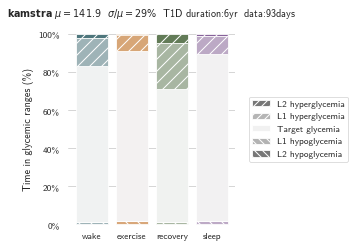

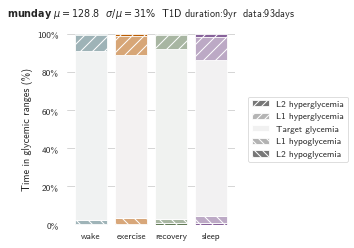

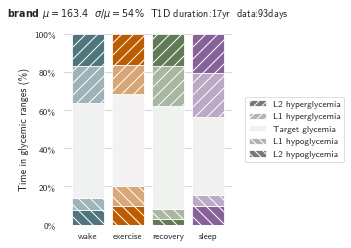

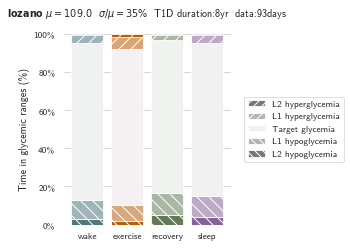

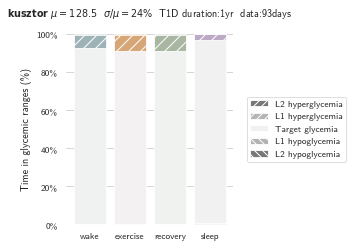

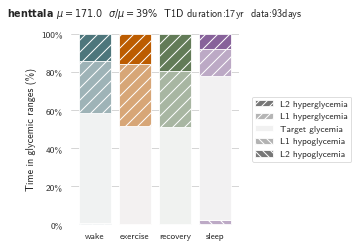

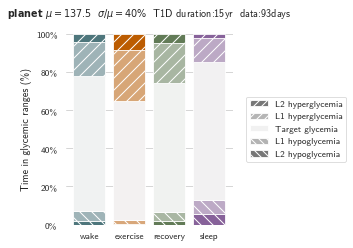

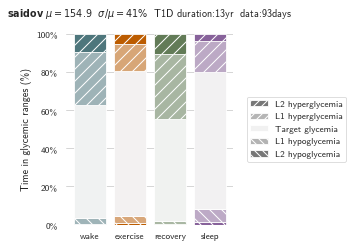

In [63]:
# TODO: check if calculation of perc_in_level is now correct!! (irvine looks weird!)
for i in ATHLETES:
	fig, ax = plt.subplots(figsize=(3, 3.5))
	for k, sec in enumerate(SECTIONS):
		pil = get_percinlevel(dc[dc[sec] & (dc.RIDER == i)])
		plot_bar(pil, x=k, colors=colors[k])

	plt.yticks(np.arange(0, 101, 20), ['{}%'.format(j) for j in np.arange(0, 101, 20)])
	plt.xticks(np.arange(len(SECTIONS)), SECTIONS)
	plt.ylim((0,100))
	plt.ylabel('Time in glycemic ranges (%)')

	ax.legend(handles=legend_elements, loc='center right', bbox_to_anchor=(1.7, 0.5))
	ax.yaxis.grid(True)
	sns.despine(left=True, bottom=True, right=True)
    
	title = r'$\mu = {:.1f}$  $\sigma/\mu = {:.0f}\%$  T1D duration:{:.0f}yr  data:{:.0f}days'\
		.format(dc[dc.RIDER == i][COL].mean(),
				dc[dc.RIDER == i][COL].std()/dc[dc.RIDER == i][COL].mean()*100,
				info.loc[i, 'diabetes_duration'],
				len(dc_agg.loc[i]))
	savefig(path='time_in_zone/time_in_glucoselevel', i=i, title=title, y=1.06)

All, hue: athletes

In [64]:
colors = [dict(zip(['h_neg', 'h_pos', 'l', 's'], [c[0]*360, c[0]*360, c[1]*100, c[2]*100])) \
			for c in [rgb_to_hls(*j) for j in palette_ath]]

In [65]:
"""
fig, ax = plt.subplots(figsize=(8,4))
for n, i in enumerate(ATHLETES):
    pil = get_percinlevel(dc[dc.RIDER == i])
    plot_bar(pil, x=n, width=.7, colors=colors[n], duration=info['diabetes_duration'][i], plot_numbers='half')

# plot reference
plt.plot((n+1-0.2, n+1-0.2), (0, 100), color='black')
plot_bar({'hypo L2':1.2, 'hypo L1':3.2, 'target':70.2, 'hyper L1':20.2, 'hyper L2':5.2}, 
         x=n+1.5, width=.7, plot_numbers='full')
plt.annotate('<3', xy=(n+1.5, 2.5), xytext=(n+2, 5), ha='left', arrowprops=dict(arrowstyle="-", color='black'))
plt.annotate('<1', xy=(n+1.5, 0.5), xytext=(n+2, 0.5), ha='left', arrowprops=dict(arrowstyle="-", color='black'))
plt.text(n+1, 109, 'Battelino et al. (2019)', fontweight='bold', ha='left') # TODO

# diabetes duration on bottom
plt.text(-2, 103, 'T1D duration (yr)', ha='center')

# ticks and axes
plt.yticks(np.arange(0, 101, 20), ['{}%'.format(j) for j in np.arange(0, 101, 20)], weight='bold')
plt.xticks(np.arange(len(ATHLETES)), ATHLETES, weight='bold')
plt.xlim((-1, 15.5))
plt.ylim((0,100))
plt.ylabel('Time in glycemic ranges (%)', weight='bold')
plt.xlabel('Rider', weight='bold')
ax.xaxis.set_label_position('top')
plt.tick_params(axis='both', which='major', labelbottom = False, bottom=False, top=False, labeltop=True)
ax.tick_params(axis='x', direction='out', pad=12)

for n, i in enumerate(ATHLETES):
    ax.get_xticklabels()[n].set_color(sns.diverging_palette(**colors[n], n=1)[0]) 

ax.legend(handles=legend_elements, loc='center right', bbox_to_anchor=(1.2, 0.5))
ax.yaxis.grid(True)
sns.despine(bottom=False, right=True, top=False)

# TODO
#ax2 = plt.axes([0.125,0.125,0.775,0.83], facecolor='none')
#ax2.xaxis.set_label_position('top')
#sns.despine(ax=ax2, top=False, left=True, bottom=True, right=True)
#ax2.tick_params(left=False, labelleft=False, top=False, labeltop=False)
savefig('time_in_zone/time_in_glucoselevel_riders', xticks=ax)
"""

'\nfig, ax = plt.subplots(figsize=(8,4))\nfor n, i in enumerate(ATHLETES):\n    pil = get_percinlevel(dc[dc.RIDER == i])\n    plot_bar(pil, x=n, width=.7, colors=colors[n], duration=info[\'diabetes_duration\'][i], plot_numbers=\'half\')\n\n# plot reference\nplt.plot((n+1-0.2, n+1-0.2), (0, 100), color=\'black\')\nplot_bar({\'hypo L2\':1.2, \'hypo L1\':3.2, \'target\':70.2, \'hyper L1\':20.2, \'hyper L2\':5.2}, \n         x=n+1.5, width=.7, plot_numbers=\'full\')\nplt.annotate(\'<3\', xy=(n+1.5, 2.5), xytext=(n+2, 5), ha=\'left\', arrowprops=dict(arrowstyle="-", color=\'black\'))\nplt.annotate(\'<1\', xy=(n+1.5, 0.5), xytext=(n+2, 0.5), ha=\'left\', arrowprops=dict(arrowstyle="-", color=\'black\'))\nplt.text(n+1, 109, \'Battelino et al. (2019)\', fontweight=\'bold\', ha=\'left\') # TODO\n\n# diabetes duration on bottom\nplt.text(-2, 103, \'T1D duration (yr)\', ha=\'center\')\n\n# ticks and axes\nplt.yticks(np.arange(0, 101, 20), [\'{}%\'.format(j) for j in np.arange(0, 101, 20)], weight

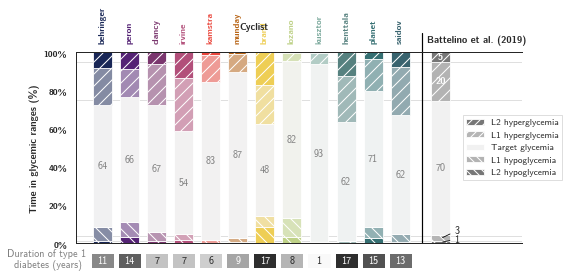

In [65]:
fig, (ax, ax0) = plt.subplots(2,1, figsize=(8,4), gridspec_kw={'height_ratios':[10,1], 'hspace': 0.07})

# grid in plot
ax.axhline(1, color='gray', alpha=.5, linewidth=.5, zorder=1)
ax.axhline(4, color='gray', alpha=.5, linewidth=.5, zorder=1)
ax.axhline(75, color='gray', alpha=.5, linewidth=.5, zorder=1)
ax.axhline(95, color='gray', alpha=.5, linewidth=.5, zorder=1)

# plot bars
for n, i in enumerate(ATHLETES):
    pil = get_percinlevel(dc[dc.RIDER == i])
    plot_bar(pil, x=n, width=.7, colors=colors[n], #duration=info['diabetes_duration'][i], 
             ax=ax, plot_numbers='half')

# plot reference
ax.plot((n+1-0.2, n+1-0.2), (0, 110), color='black', clip_on=False)
plot_bar({'hypo L2':1.2, 'hypo L1':3.2, 'target':70.2, 'hyper L1':20.2, 'hyper L2':5.2}, 
         x=n+1.5, width=.7, plot_numbers='full', ax=ax)
ax.annotate('3', xy=(n+1.5, 2.5), xytext=(n+2, 5), ha='left', arrowprops=dict(arrowstyle="-", color='black'))
ax.annotate('1', xy=(n+1.5, 0.5), xytext=(n+2, 0.5), ha='left', arrowprops=dict(arrowstyle="-", color='black'))
ax.text(n+1, 105, 'Battelino et al. (2019)', fontweight='bold', ha='left')

# ticks and axes
ax.set_yticks(np.arange(0, 101, 20), ['{}%'.format(j) for j in np.arange(0, 101, 20)], weight='bold')
ax.set_xticks(np.arange(len(ATHLETES)), ATHLETES, weight='bold')
ax.set_xlim((-1, 15.5))
ax.set_ylim((0,100))
ax.set_ylabel('Time in glycemic ranges (%)', weight='bold')
ax.set_xlabel('Cyclist', weight='bold')
ax.xaxis.set_label_position('top')
ax.xaxis.set_label_coords(0.4, 1.12)
ax.tick_params(axis='both', which='major', labelbottom = False, bottom=False, top=False, labeltop=True)

for n, i in enumerate(ATHLETES):
    ax.get_xticklabels()[n].set_color(sns.diverging_palette(**colors[n], n=1)[0]) 

ax.legend(handles=legend_elements, loc='center right', bbox_to_anchor=(1.1, 0.5), fancybox=False)
sns.despine(ax=ax, bottom=False, right=True, top=False)

# diabetes duration on bottom
sns.heatmap(info['diabetes_duration'].to_frame().T, ax=ax0, xticklabels=False, yticklabels=False,
            annot=True, cbar=False, cmap='Greys', linewidths=5, vmin=0, vmax=20)
ax0.set_xlim((-0.5, 16))
ax0.set_xlabel(None)
ax0.text(-1.5, 0.3, 'Duration of type 1 ', ha='center', color='gray')
ax0.text(-1.5, 0.9, 'diabetes (years)', ha='center', color='gray')

savefig('time_in_zone/time_in_glucoselevel_riders', xticks=ax)

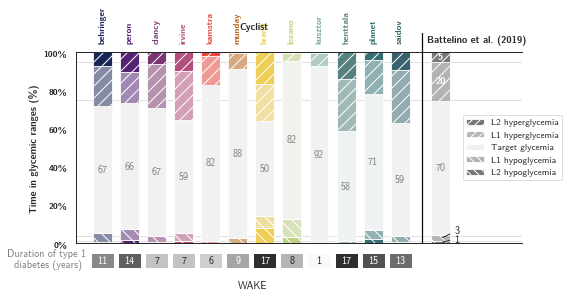

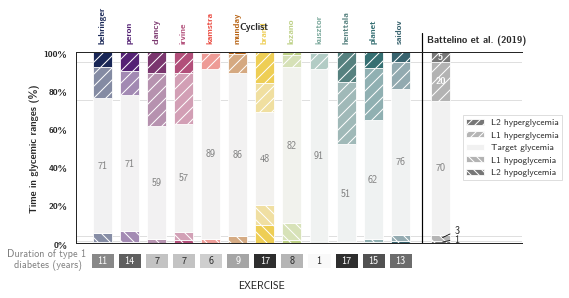

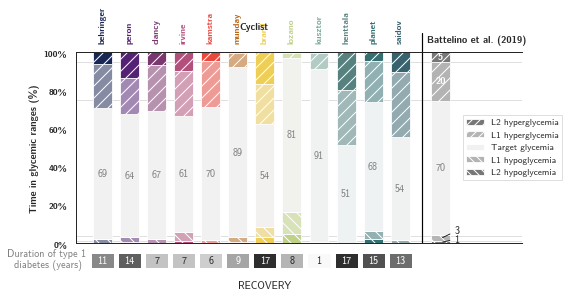

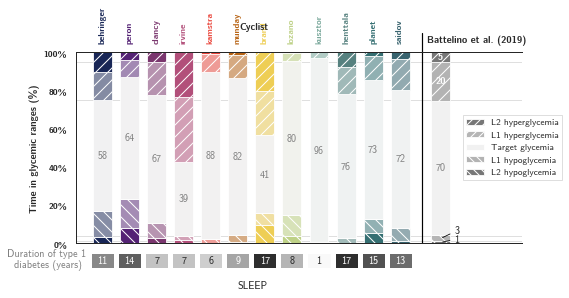

In [66]:
for sec in SECTIONS:
    fig, (ax, ax0) = plt.subplots(2,1, figsize=(8,4), gridspec_kw={'height_ratios':[10,1], 'hspace': 0.07})

    # grid in plot
    ax.axhline(1, color='gray', alpha=.5, linewidth=.5, zorder=1)
    ax.axhline(4, color='gray', alpha=.5, linewidth=.5, zorder=1)
    ax.axhline(75, color='gray', alpha=.5, linewidth=.5, zorder=1)
    ax.axhline(95, color='gray', alpha=.5, linewidth=.5, zorder=1)

    # plot bars
    for n, i in enumerate(ATHLETES):
        pil = get_percinlevel(dc[(dc.RIDER == i) & dc[sec]])
        plot_bar(pil, x=n, width=.7, colors=colors[n], #duration=info['diabetes_duration'][i], 
                 ax=ax, plot_numbers='half')

    # plot reference
    ax.plot((n+1-0.2, n+1-0.2), (0, 110), color='black', clip_on=False)
    plot_bar({'hypo L2':1.2, 'hypo L1':3.2, 'target':70.2, 'hyper L1':20.2, 'hyper L2':5.2}, 
             x=n+1.5, width=.7, plot_numbers='full', ax=ax)
    ax.annotate('3', xy=(n+1.5, 2.5), xytext=(n+2, 5), ha='left', arrowprops=dict(arrowstyle="-", color='black'))
    ax.annotate('1', xy=(n+1.5, 0.5), xytext=(n+2, 0.5), ha='left', arrowprops=dict(arrowstyle="-", color='black'))
    ax.text(n+1, 105, 'Battelino et al. (2019)', fontweight='bold', ha='left')
    
    # ticks and axes
    ax.set_yticks(np.arange(0, 101, 20), ['{}%'.format(j) for j in np.arange(0, 101, 20)], weight='bold')
    ax.set_xticks(np.arange(len(ATHLETES)), ATHLETES, weight='bold')
    ax.set_xlim((-1, 15.5))
    ax.set_ylim((0,100))
    ax.set_ylabel('Time in glycemic ranges (%)', weight='bold')
    ax.set_xlabel('Cyclist', weight='bold')
    ax.xaxis.set_label_position('top')
    ax.xaxis.set_label_coords(0.4, 1.12)
    ax.tick_params(axis='both', which='major', labelbottom = False, bottom=False, top=False, labeltop=True)

    for n, i in enumerate(ATHLETES):
        ax.get_xticklabels()[n].set_color(sns.diverging_palette(**colors[n], n=1)[0]) 

    ax.legend(handles=legend_elements, loc='center right', bbox_to_anchor=(1.1, 0.5), fancybox=False)
    sns.despine(ax=ax, bottom=False, right=True, top=False)

    # diabetes duration on bottom
    sns.heatmap(info['diabetes_duration'].to_frame().T, ax=ax0, xticklabels=False, yticklabels=False,
                annot=True, cbar=False, cmap='Greys', linewidths=5, vmin=0, vmax=20)
    ax0.set_xlim((-0.5, 16))
    ax0.set_xlabel(None)
    ax0.text(-1.5, 0.3, 'Duration of type 1 ', ha='center', color='gray')
    ax0.text(-1.5, 0.9, 'diabetes (years)', ha='center', color='gray')

    ax0.text(n/2, 2, sec.upper())
    
    savefig('time_in_zone/time_in_glucoselevel_riders_%s'%sec, xticks=ax)

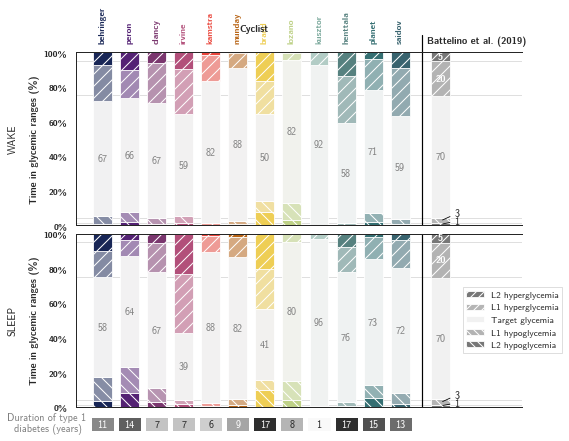

In [67]:
fig, axs = plt.subplots(3,1, figsize=(8,7), gridspec_kw={'height_ratios':[10, 10,1], 'hspace': 0.07})

for ax, sec in zip(axs[:2], ('wake', 'sleep')):
    # grid in plot
    ax.axhline(1, color='gray', alpha=.5, linewidth=.5, zorder=1)
    ax.axhline(4, color='gray', alpha=.5, linewidth=.5, zorder=1)
    ax.axhline(75, color='gray', alpha=.5, linewidth=.5, zorder=1)
    ax.axhline(95, color='gray', alpha=.5, linewidth=.5, zorder=1)

    # plot bars
    for n, i in enumerate(ATHLETES):
        pil = get_percinlevel(dc[(dc.RIDER == i) & dc[sec]])
        plot_bar(pil, x=n, width=.7, colors=colors[n], ax=ax, plot_numbers='half')

    # plot reference
    ax.plot((n+1-0.2, n+1-0.2), (0, 100), color='black', clip_on=False)
    plot_bar({'hypo L2':1.2, 'hypo L1':3.2, 'target':70.2, 'hyper L1':20.2, 'hyper L2':5.2}, 
             x=n+1.5, width=.7, plot_numbers='full', ax=ax)
    ax.annotate('3', xy=(n+1.5, 2.5), xytext=(n+2, 5), ha='left', arrowprops=dict(arrowstyle="-", color='black'))
    ax.annotate('1', xy=(n+1.5, 0.5), xytext=(n+2, 0.5), ha='left', arrowprops=dict(arrowstyle="-", color='black'))

    # ticks and axes
    ax.set_yticks(np.arange(0, 101, 20), ['{}%'.format(j) for j in np.arange(0, 101, 20)], weight='bold')
    ax.set_xlim((-1, 15.5))
    ax.set_ylim((0,100))
    ax.set_ylabel('Time in glycemic ranges (%)', weight='bold')

    ax.text(-3.5, 50, sec.upper(), rotation=90, va='center')

axs[0].plot((n+1-0.2, n+1-0.2), (100, 110), color='black', clip_on=False)

# reference
axs[0].text(n+1, 105, 'Battelino et al. (2019)', fontweight='bold', ha='left')

# ticks
axs[0].set_xticks(np.arange(len(ATHLETES)), ATHLETES, weight='bold')
axs[0].set_xlabel('Cyclist', weight='bold')
axs[0].xaxis.set_label_position('top')
axs[0].xaxis.set_label_coords(0.4, 1.12)
axs[0].tick_params(axis='both', which='major', labelbottom = False, bottom=False, top=False, labeltop=True)
axs[1].tick_params(axis='both', which='major', labelbottom = False, bottom=False, top=False, labeltop=False)

for n, i in enumerate(ATHLETES):
    axs[0].get_xticklabels()[n].set_color(sns.diverging_palette(**colors[n], n=1)[0]) 

axs[1].legend(handles=legend_elements, loc='center right', bbox_to_anchor=(1.1, 0.5), fancybox=False)
sns.despine(ax=axs[0], bottom=False, right=True, top=False)
sns.despine(ax=axs[1], bottom=False, right=True, top=False)

# diabetes duration on bottom
sns.heatmap(info['diabetes_duration'].to_frame().T, ax=axs[2], xticklabels=False, yticklabels=False,
            annot=True, cbar=False, cmap='Greys', linewidths=5, vmin=0, vmax=20)
axs[2].set_xlim((-0.5, 16))
axs[2].set_xlabel(None)
axs[2].text(-1.5, 0.3, 'Duration of type 1 ', ha='center', color='gray')
axs[2].text(-1.5, 0.9, 'diabetes (years)', ha='center', color='gray')

savefig('time_in_zone/time_in_glucoselevel_riders_daynight', xticks=axs[0])

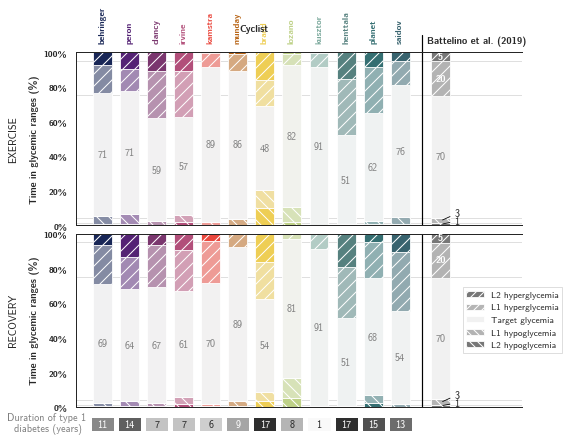

In [68]:
fig, axs = plt.subplots(3,1, figsize=(8,7), gridspec_kw={'height_ratios':[10, 10,1], 'hspace': 0.07})

for ax, sec in zip(axs[:2], ('exercise', 'recovery')):
    # grid in plot
    ax.axhline(1, color='gray', alpha=.5, linewidth=.5, zorder=1)
    ax.axhline(4, color='gray', alpha=.5, linewidth=.5, zorder=1)
    ax.axhline(75, color='gray', alpha=.5, linewidth=.5, zorder=1)
    ax.axhline(95, color='gray', alpha=.5, linewidth=.5, zorder=1)

    # plot bars
    for n, i in enumerate(ATHLETES):
        pil = get_percinlevel(dc[(dc.RIDER == i) & dc[sec]])
        plot_bar(pil, x=n, width=.7, colors=colors[n], ax=ax, plot_numbers='half')

    # plot reference
    ax.plot((n+1-0.2, n+1-0.2), (0, 100), color='black', clip_on=False)
    plot_bar({'hypo L2':1.2, 'hypo L1':3.2, 'target':70.2, 'hyper L1':20.2, 'hyper L2':5.2}, 
             x=n+1.5, width=.7, plot_numbers='full', ax=ax)
    ax.annotate('3', xy=(n+1.5, 2.5), xytext=(n+2, 5), ha='left', arrowprops=dict(arrowstyle="-", color='black'))
    ax.annotate('1', xy=(n+1.5, 0.5), xytext=(n+2, 0.5), ha='left', arrowprops=dict(arrowstyle="-", color='black'))


    # ticks and axes
    ax.set_yticks(np.arange(0, 101, 20), ['{}%'.format(j) for j in np.arange(0, 101, 20)], weight='bold')
    ax.set_xlim((-1, 15.5))
    ax.set_ylim((0,100))
    ax.set_ylabel('Time in glycemic ranges (%)', weight='bold')

    ax.text(-3.5, 50, sec.upper(), rotation=90, va='center')

axs[0].plot((n+1-0.2, n+1-0.2), (100, 110), color='black', clip_on=False)

# reference
axs[0].text(n+1, 105, 'Battelino et al. (2019)', fontweight='bold', ha='left')

# ticks
axs[0].set_xticks(np.arange(len(ATHLETES)), ATHLETES, weight='bold')
axs[0].set_xlabel('Cyclist', weight='bold')
axs[0].xaxis.set_label_position('top')
axs[0].xaxis.set_label_coords(0.4, 1.12)
axs[0].tick_params(axis='both', which='major', labelbottom = False, bottom=False, top=False, labeltop=True)
axs[1].tick_params(axis='both', which='major', labelbottom = False, bottom=False, top=False, labeltop=False)

for n, i in enumerate(ATHLETES):
    axs[0].get_xticklabels()[n].set_color(sns.diverging_palette(**colors[n], n=1)[0]) 

axs[1].legend(handles=legend_elements, loc='center right', bbox_to_anchor=(1.1, 0.5), fancybox=False)
sns.despine(ax=axs[0], bottom=False, right=True, top=False)
sns.despine(ax=axs[1], bottom=False, right=True, top=False)

# diabetes duration on bottom
sns.heatmap(info['diabetes_duration'].to_frame().T, ax=axs[2], xticklabels=False, yticklabels=False,
            annot=True, cbar=False, cmap='Greys', linewidths=5, vmin=0, vmax=20)
axs[2].set_xlim((-0.5, 16))
axs[2].set_xlabel(None)
axs[2].text(-1.5, 0.3, 'Duration of type 1 ', ha='center', color='gray')
axs[2].text(-1.5, 0.9, 'diabetes (years)', ha='center', color='gray')

savefig('time_in_zone/time_in_glucoselevel_riders_exerciserecovery', xticks=axs[0])

/local/home/evanweenen/.local/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in long_scalars
  
/local/home/evanweenen/.local/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in long_scalars
  
/local/home/evanweenen/.local/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in long_scalars
  
/local/home/evanweenen/.local/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in long_scalars
  
/local/home/evanweenen/.local/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in long_scalars
  


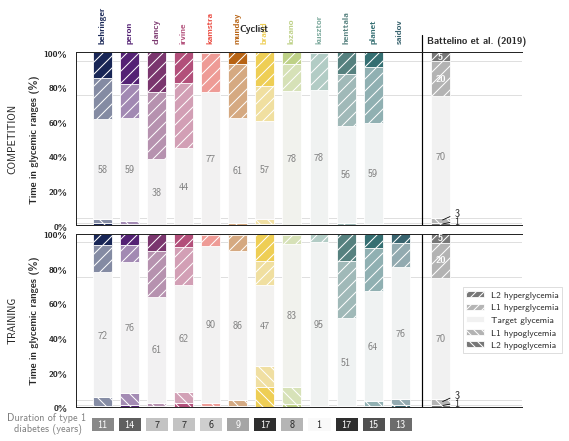

In [69]:
fig, axs = plt.subplots(3,1, figsize=(8,7), gridspec_kw={'height_ratios':[10, 10,1], 'hspace': 0.07})
MASK = {'competition': dc['race'] & dc['exercise'],
        'training'   : ~dc['race'] & dc['exercise']}
for ax, (sec, mask) in zip(axs[:2], MASK.items()):
    # grid in plot
    ax.axhline(1, color='gray', alpha=.5, linewidth=.5, zorder=1)
    ax.axhline(4, color='gray', alpha=.5, linewidth=.5, zorder=1)
    ax.axhline(75, color='gray', alpha=.5, linewidth=.5, zorder=1)
    ax.axhline(95, color='gray', alpha=.5, linewidth=.5, zorder=1)

    for n, i in enumerate(ATHLETES):
        pil = get_percinlevel(dc[(dc.RIDER == i) & mask])
        plot_bar(pil, ax=ax, x=n, width=.7, colors=colors[n], plot_numbers='half')

    ax.plot((n+1-0.2, n+1-0.2), (0, 100), color='black')
    plot_bar({'hypo L2':1.2, 'hypo L1':3.2, 'target':70.2, 'hyper L1':20.2, 'hyper L2':5.2}, 
             ax=ax, x=n+1.5, width=.7, plot_numbers='full')
    ax.annotate('3', xy=(n+1.5, 2.5), xytext=(n+2, 5), ha='left', arrowprops=dict(arrowstyle="-", color='black'))
    ax.annotate('1', xy=(n+1.5, 0.5), xytext=(n+2, 0.5), ha='left', arrowprops=dict(arrowstyle="-", color='black'))

    # ticks and axes
    ax.set_yticks(np.arange(0, 101, 20), ['{}%'.format(j) for j in np.arange(0, 101, 20)], weight='bold')
    ax.set_xlim((-1, 15.5))
    ax.set_ylim((0,100))
    ax.set_ylabel('Time in glycemic ranges (%)', weight='bold')
        
    ax.text(-3.5, 50, sec.upper(), rotation=90, va='center')

axs[0].plot((n+1-0.2, n+1-0.2), (100, 110), color='black', clip_on=False)
 
# reference
axs[0].text(n+1, 105, 'Battelino et al. (2019)', fontweight='bold', ha='left')

# ticks
axs[0].set_xticks(np.arange(len(ATHLETES)), ATHLETES, weight='bold')
axs[0].set_xlabel('Cyclist', weight='bold')
axs[0].xaxis.set_label_position('top')
axs[0].xaxis.set_label_coords(0.4, 1.12)
axs[0].tick_params(axis='both', which='major', labelbottom = False, bottom=False, top=False, labeltop=True)
axs[1].tick_params(axis='both', which='major', labelbottom = False, bottom=False, top=False, labeltop=False)

for n, i in enumerate(ATHLETES):
    axs[0].get_xticklabels()[n].set_color(sns.diverging_palette(**colors[n], n=1)[0]) 

axs[1].legend(handles=legend_elements, loc='center right', bbox_to_anchor=(1.1, 0.5), fancybox=False)
sns.despine(ax=axs[0], bottom=False, right=True, top=False)
sns.despine(ax=axs[1], bottom=False, right=True, top=False)

# diabetes duration on bottom
sns.heatmap(info['diabetes_duration'].to_frame().T, ax=axs[2], xticklabels=False, yticklabels=False,
            annot=True, cbar=False, cmap='Greys', linewidths=5, vmin=0, vmax=20)
axs[2].set_xlim((-0.5, 16))
axs[2].set_xlabel(None)
axs[2].text(-1.5, 0.3, 'Duration of type 1 ', ha='center', color='gray')
axs[2].text(-1.5, 0.9, 'diabetes (years)', ha='center', color='gray')

savefig('time_in_zone/time_in_glucoselevel_riders_competitiontrain', xticks=axs[0])

**CONCLUSION** : Large differences among athletes

#### Race vs. no race

In [70]:
# race vs no race
colors = [dict(zip(['h_neg', 'h_pos', 'l', 's'], [c[0]*360, c[0]*360, c[1]*100, c[2]*100])) \
			for c in [rgb_to_hls(*j) for j in color_race.values()]]

All, hue: race

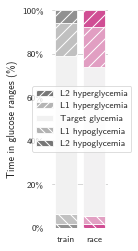

In [71]:
fig, ax = plt.subplots(figsize=(1,4))
for k, b in enumerate([False, True]):
	pil = get_percinlevel(dc[dc['race'] == b])
	plot_bar(pil, x=k, colors=colors[k])

plt.yticks(np.arange(0, 101, 20), ['{}%'.format(j) for j in np.arange(0, 101, 20)])
plt.xticks(np.arange(2), [j for j in color_race.keys()])
plt.ylim((0,100))
plt.ylabel('Time in glucose ranges (%)')

ax.legend(handles=legend_elements, loc='center right', bbox_to_anchor=(1.5, 0.5))
ax.yaxis.grid(True)
sns.despine(left=True, bottom=True, right=True)

savefig('time_in_zone/time_in_glucoselevel_race')

Individual athletes, hue: race

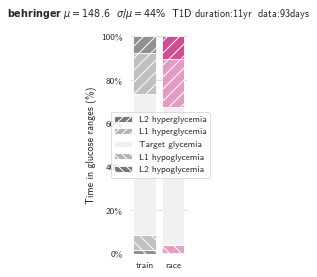

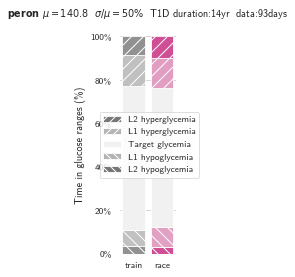

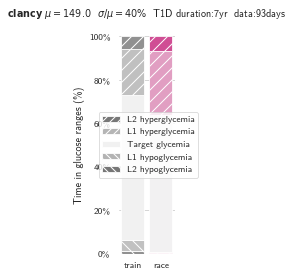

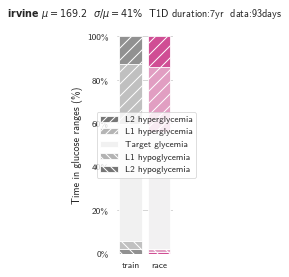

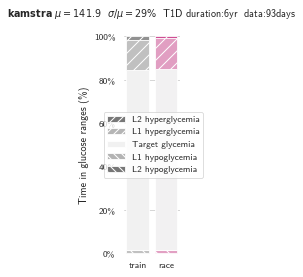

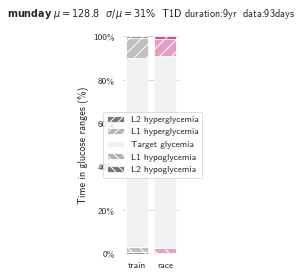

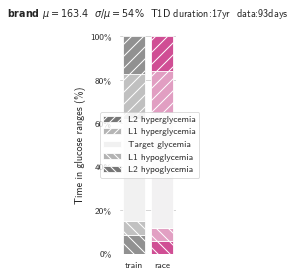

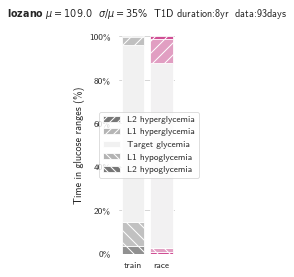

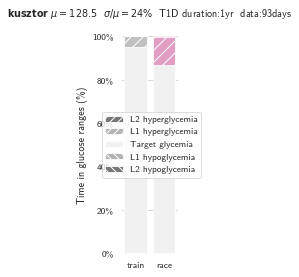

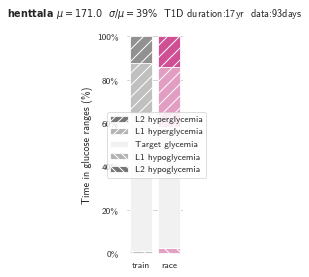

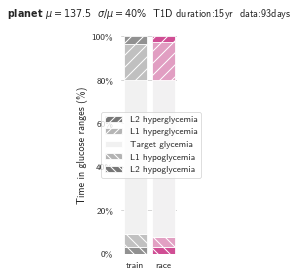

/local/home/evanweenen/.local/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in long_scalars
  
/local/home/evanweenen/.local/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in long_scalars
  
/local/home/evanweenen/.local/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in long_scalars
  
/local/home/evanweenen/.local/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in long_scalars
  
/local/home/evanweenen/.local/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in long_scalars
  


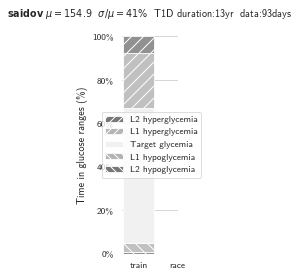

In [72]:
for i in ATHLETES:
	fig, ax = plt.subplots(figsize=(1,4))
	for k, b in enumerate([False, True]):
		pil = get_percinlevel(dc[(dc.RIDER == i) & (dc['race'] == b)])
		plot_bar(pil, x=k, colors=colors[k])

	plt.yticks(np.arange(0, 101, 20), ['{}%'.format(j) for j in np.arange(0, 101, 20)])
	plt.xticks(np.arange(2), [j for j in color_race.keys()])
	plt.ylim((0,100))
	plt.ylabel('Time in glucose ranges (%)')

	ax.legend(handles=legend_elements, loc='center right', bbox_to_anchor=(1.5, 0.5))
	ax.yaxis.grid(True)
	sns.despine(left=True, bottom=True, right=True)

	title = r'$\mu = {:.1f}$  $\sigma/\mu = {:.0f}\%$  T1D duration:{:.0f}yr  data:{:.0f}days'\
		.format(dc[dc.RIDER == i][COL].mean(),
				dc[dc.RIDER == i][COL].std()/dc[dc.RIDER == i][COL].mean()*100,
				info.loc[i, 'diabetes_duration'],
				len(dc_agg.loc[i]))
	savefig(path='time_in_zone/time_in_glucoselevel_race', i=i, title=title, y=1.06)

### Glucose distribution (boxplots)

In [73]:
kws_box = {'race':	dict(boxprops=dict(color='w', facecolor=color_race['race'], hatch='\\\\\\'),
						 medianprops=dict(color='w', linewidth=2),
						 whiskerprops=dict(color=color_race['race']), capprops=dict(color=color_race['race'])),
		   'train':dict(boxprops=dict(color='w', facecolor=color_race['train'], hatch='///'),
						 medianprops=dict(color='w', linewidth=2),
						 whiskerprops=dict(color=color_race['train']), capprops=dict(color=color_race['train']))}

All, stratify: sections

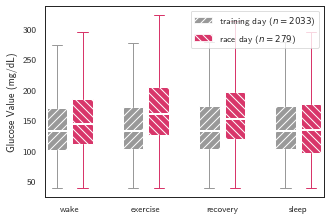

In [74]:
n_nc = len(dc.loc[dc['race'] == False, ['RIDER', 'date']].drop_duplicates())
n_rc = len(dc.loc[dc['race'] == True, ['RIDER', 'date']].drop_duplicates())

fig, ax = plt.subplots(figsize=(5,3.5))
for k, sec in enumerate(SECTIONS):
	plt.boxplot(dc.loc[dc[sec] & dc['race']==False, COL], positions=[k+0.5+k*2], widths=[0.8],
		patch_artist=True, showfliers=False, **kws_box['train'])
	plt.boxplot(dc.loc[dc[sec] & dc['race']==True, COL], positions=[k+1.5+k*2], widths=[0.8],
		patch_artist=True, showfliers=False, **kws_box['race'])
plt.xticks([1,4,7,10], SECTIONS)
plt.ylabel(COL)
plt.legend(handles=[Patch(facecolor=color_race['train'], edgecolor='white', hatch='///', label='training day'+r' ($n = {:.0f}$)'.format(n_nc)),
					Patch(facecolor=color_race['race'], edgecolor='white', hatch='\\\\\\', label='race day'r' ($n = {:.0f}$)'.format(n_rc))], 
			loc='upper right')
savefig('boxplot/box_glucose_sections')

Individual athletes, stratify: sections

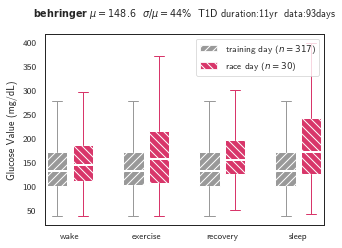

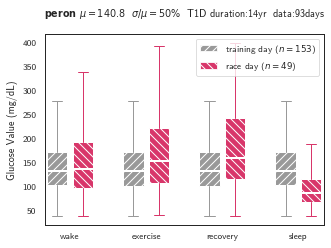

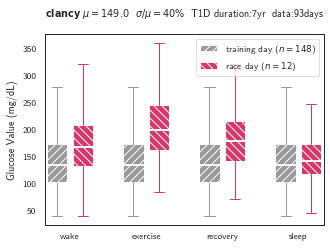

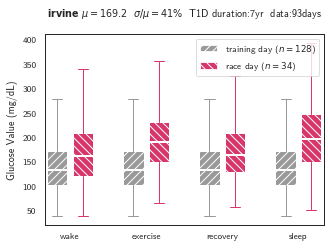

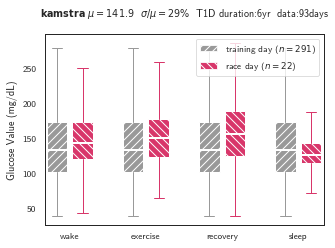

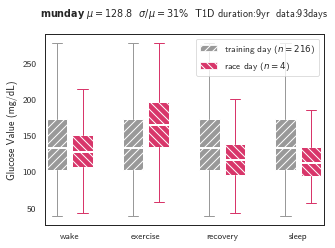

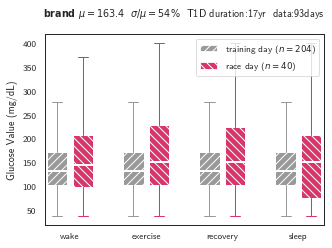

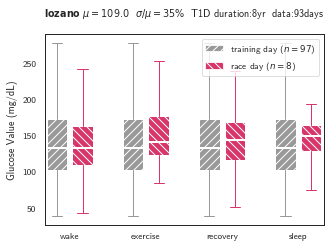

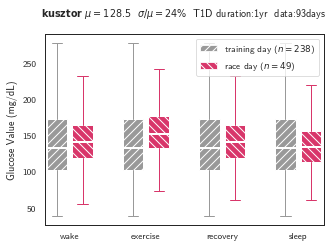

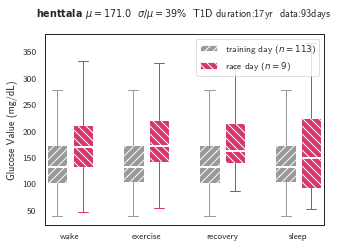

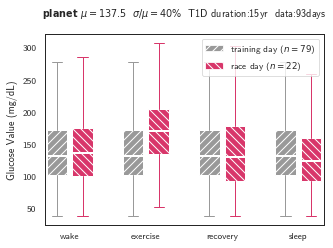

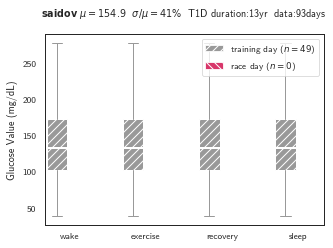

In [75]:
for i in ATHLETES:
	n_nc = len(dc.loc[(dc.RIDER == i) & (dc['race'] == False), 'local_timestamp'].dt.date.unique())
	n_rc = len(dc.loc[(dc.RIDER == i) & (dc['race'] == True), 'local_timestamp'].dt.date.unique())

	fig, ax = plt.subplots(figsize=(5,3.5))
	for k, sec in enumerate(SECTIONS):
		plt.boxplot(dc.loc[(dc.RIDER == i) & dc[sec] & dc['race']==False, COL], positions=[k+0.5+k*2], widths=[0.8],
			patch_artist=True, showfliers=False, **kws_box['train'])
		plt.boxplot(dc.loc[(dc.RIDER == i) & dc[sec] & dc['race']==True, COL], positions=[k+1.5+k*2], widths=[0.8],
			patch_artist=True, showfliers=False, **kws_box['race'])
	plt.xticks([1,4,7,10], SECTIONS)
	plt.ylabel(COL)
	plt.legend(handles=[Patch(facecolor=color_race['train'], edgecolor='white', hatch='///', label='training day'+r' ($n = {:.0f}$)'.format(n_nc)),
						Patch(facecolor=color_race['race'], edgecolor='white', hatch='\\\\\\', label='race day'r' ($n = {:.0f}$)'.format(n_rc))], 
				loc='upper right')

	title = r'$\mu = {:.1f}$  $\sigma/\mu = {:.0f}\%$  T1D duration:{:.0f}yr  data:{:.0f}days'\
		.format(dc[dc.RIDER == i][COL].mean(),
				dc[dc.RIDER == i][COL].std()/dc[dc.RIDER == i][COL].mean()*100,
				info.loc[i, 'diabetes_duration'],
				len(dc_agg.loc[i]))
	savefig(path='boxplot/box_glucose_sections', i=i, title=title, y=1.06)

All, stratify: athletes

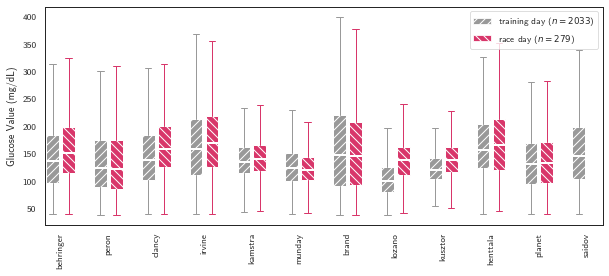

In [76]:
n_nc = len(dc.loc[dc['race'] == False, ['RIDER', 'date']].drop_duplicates())
n_rc = len(dc.loc[dc['race'] == True, ['RIDER', 'date']].drop_duplicates())

# hue: athlete
fig, ax = plt.subplots(figsize=(10,4))
for n, i in enumerate(ATHLETES):
	plt.boxplot(dc.loc[(dc.RIDER == i) & (dc['race'] == False), COL], positions=[n+0.5+n*2], widths=[0.8],
		patch_artist=True, showfliers=False, **kws_box['train'])
	plt.boxplot(dc.loc[(dc.RIDER == i) & (dc['race'] == True), COL], positions=[n+1.5+n*2], widths=[0.8],
		patch_artist=True, showfliers=False, **kws_box['race'])
plt.ylabel(COL)
plt.legend(handles=[Patch(facecolor=color_race['train'], edgecolor='white', hatch='///', label='training day'+r' ($n = {:.0f}$)'.format(n_nc)),
					Patch(facecolor=color_race['race'], edgecolor='white', hatch='\\\\\\', label='race day'r' ($n = {:.0f}$)'.format(n_rc))], 
			loc='upper right')
plt.xticks(np.arange(1, len(ATHLETES)*3,3), ATHLETES)

savefig('boxplot/box_glucose_riders', xticks=ax)

### Glucose during cycling (longitudinal)

In [77]:
# session id
dc['tid'] = dc.loc[dc['exercise'] != dc['exercise'].shift(), 'exercise'].cumsum()
dc['tid'] = dc['tid'].fillna(method='ffill')

# time within session
dc['t'] = dc.groupby('tid').cumcount() * 5
dc

RIDER           timestamp  Glucose Value (mg/dL)     local_timestamp  \
0            1 2018-11-05 05:00:00                   73.0 2018-11-05 06:00:00   
1            1 2018-11-05 05:05:00                   73.0 2018-11-05 06:05:00   
2            1 2018-11-05 05:10:00                   73.0 2018-11-05 06:10:00   
3            1 2018-11-05 05:15:00                   73.0 2018-11-05 06:15:00   
4            1 2018-11-05 05:20:00                   73.0 2018-11-05 06:20:00   
...        ...                 ...                    ...                 ...   
1267159     14 2019-01-27 04:35:00                   70.0 2019-01-27 05:35:00   
1267160     14 2019-01-27 04:40:00                   72.0 2019-01-27 05:40:00   
1267161     14 2019-01-27 04:45:00                   73.0 2019-01-27 05:45:00   
1267162     14 2019-01-27 04:50:00                   54.0 2019-01-27 05:50:00   
1267163     14 2019-01-27 04:55:00                   69.0 2019-01-27 05:55:00   

         exercise  recovery   wake  sleep   race  travel       date  \
0           False     False   True  False  False   False 2018-11-05   
1           False     False   True  False  False   False 2018-11-05   
2           False     False   True  False  False   False 2018-11-05   
3           False     False   True  False  False   False 2018-11-05   
4           False     False   True  False  False   False 2018-11-05   
...           ...       ...    ...    ...    ...     ...        ...   
1267159     False     False  False   True  False   False 2019-01-27   
1267160     False     False  False   True  False   False 2019-01-27   
1267161     False     False  False   True  False   False 2019-01-27   
1267162     False     False  False   True  False   False 2019-01-27   
1267163     False     False  False   True  False   False 2019-01-27   

           date_6h  completeness     tid     t  
0       2018-11-05      0.920139     0.0     0  
1       2018-11-05      0.920139     0.0     5  
2       2018-11-05      0.920139     0.0    10  
3       2018-11-05      0.920139     0.0    15  
4       2018-11-05      0.920139     0.0    20  
...            ...           ...     ...   ...  
1267159 2019-01-26      0.961806  1971.0  1135  
1267160 2019-01-26      0.961806  1971.0  1140  
1267161 2019-01-26      0.961806  1971.0  1145  
1267162 2019-01-26      0.961806  1971.0  1150  
1267163 2019-01-26      0.961806  1971.0  1155  

[574962 rows x 15 columns]

All

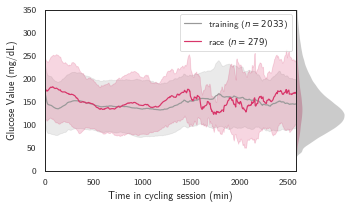

In [78]:
n_nc = len(dc.loc[dc['race'] == False, ['RIDER', 'date']].drop_duplicates())
n_rc = len(dc.loc[dc['race'] == True, ['RIDER', 'date']].drop_duplicates())

t_max = dc.groupby('tid')['t'].max().quantile(0.9) #dc['t'].max()

fig, ax = plt.subplots(1,2, figsize=(5, 3), sharey=True, gridspec_kw={'width_ratios': [5, 1], 'wspace':0}, tight_layout=True)
sns.lineplot(x=dc['t'], y=dc[COL], hue=dc['race'], ci='sd', palette=list(color_race.values()), ax=ax[0])
ax[0].set_xlabel('Time in cycling session (min)')
ax[0].legend(loc='upper right', handles=ax[0].get_legend().get_lines(), 
	labels=['training'+r' ($n = {:.0f}$)'.format(n_nc), 'race'+r' ($n = {:.0f}$)'.format(n_rc)])
sns.kdeplot(data=dc.loc[dc['t'].notna()], y=COL, hue='race', ax=ax[1],
	fill=True, alpha=.5, palette=list(color_race.values()), linewidth=0, legend=False)
sns.despine(bottom=True, right=True, top=True, ax=ax[1])
ax[1].set(xlabel=None, xticks=[])
plt.ylim((0,350))
ax[0].set_xlim((0, t_max))
savefig('time_cycling/glucose_cycling')

Individual athletes

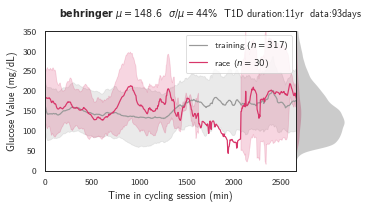

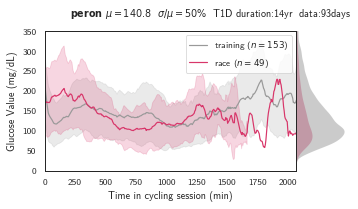

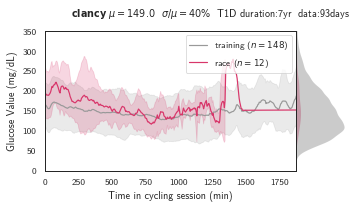

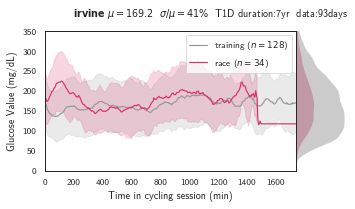

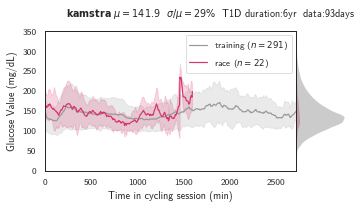

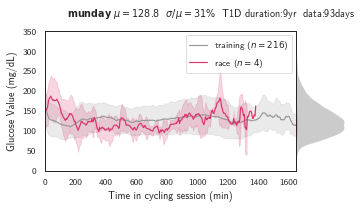

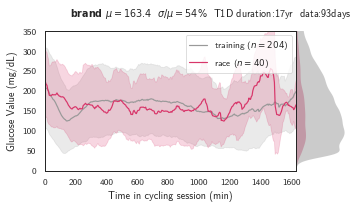

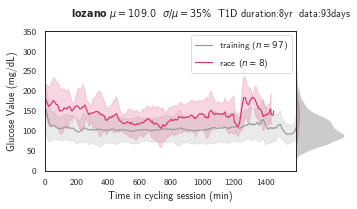

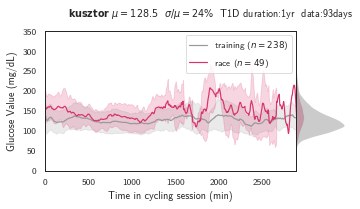

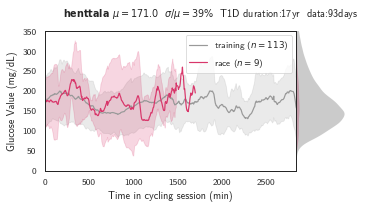

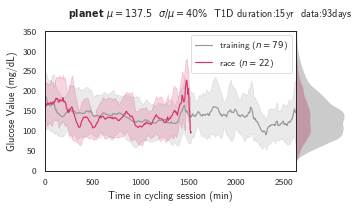

In [79]:
for i in dc[dc['race']].RIDER.unique():
	n_nc = len(dc.loc[(dc.RIDER == i) & (dc['race'] == False), 'local_timestamp'].dt.date.unique())
	n_rc = len(dc.loc[(dc.RIDER == i) & (dc['race'] == True), 'local_timestamp'].dt.date.unique())

	t_max = dc[dc.RIDER == i].groupby('tid')['t'].max().quantile(0.9)#dc.loc[dc.RIDER == i, 't'].max()

	fig, ax = plt.subplots(1,2, figsize=(5, 3), sharey=True, gridspec_kw={'width_ratios': [5, 1], 'wspace':0}, tight_layout=True)
	sns.lineplot(x=dc.loc[dc.RIDER == i,'t'], y=dc.loc[dc.RIDER == i, COL], ci='sd', hue=dc['race'], palette=list(color_race.values()), ax=ax[0])
	ax[0].set_xlabel('Time in cycling session (min)')
	ax[0].legend(loc='upper right', handles=ax[0].get_legend().get_lines(),
		labels=['training'+r' ($n = {:.0f}$)'.format(n_nc), 'race'r' ($n = {:.0f}$)'.format(n_rc)])
	sns.kdeplot(data=dc.loc[dc['t'].notna() & (dc.RIDER == i)], y=COL, hue='race', ax=ax[1],
		fill=True, alpha=.5, palette=list(color_race.values()), linewidth=0, legend=False)
	sns.despine(bottom=True, right=True, top=True, ax=ax[1])
	ax[1].set(xlabel=None, xticks=[])
	plt.ylim((0,350))
	ax[0].set_xlim((0, t_max))
	title = r'$\mu = {:.1f}$  $\sigma/\mu = {:.0f}\%$  T1D duration:{:.0f}yr  data:{:.0f}days'\
		.format(dc[dc.RIDER == i][COL].mean(),
				dc[dc.RIDER == i][COL].std()/dc[dc.RIDER == i][COL].mean()*100,
				info.loc[i, 'diabetes_duration'],
				len(dc_agg.loc[i]))
	savefig(path='time_cycling/glucose_cycling', i=i, title=title, x=-1.7, y=1.06)

### Glucose during day

In [80]:
dc['time'] = timestamp_to_seconds(dc['local_timestamp'])

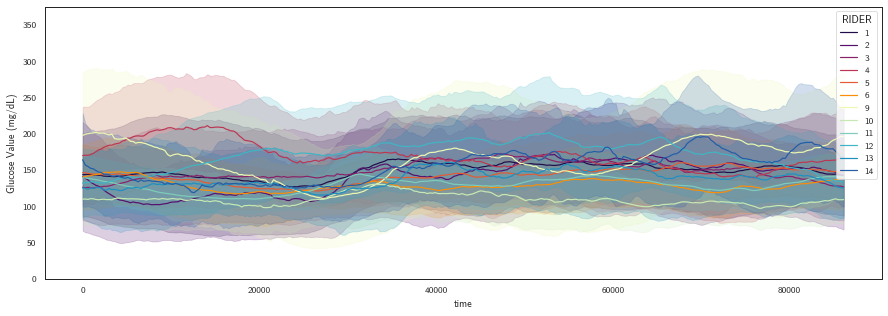

In [81]:
plt.figure(figsize=(15,5))
sns.lineplot(data=dc, x='time', y=COL, ci='sd', hue='RIDER', palette=palette_ath)
plt.ylim((0,375))
plt.show()

### Days with hypo events (during sections)

In [104]:
dc_agg = dc_agg.set_index(['RIDER', 'date'])

In [ ]:
dc_hypo = {}
for sec in SECTIONS+('1d',):
    dc_hypo[sec] = dc_agg['hypo_'+sec].groupby('RIDER').apply(lambda x: x.sum()/len(x))
dc_hypo = pd.concat(dc_hypo, axis=1) * 100
dc_hypo = dc_hypo.rename(columns={'1d':'total'})

In [82]:
dc_hyper = {}
for sec in SECTIONS+('1d',):
    dc_hyper[sec] = dc_agg['hyper_'+sec].groupby('RIDER').apply(lambda x: x.sum()/len(x))
dc_hyper = pd.concat(dc_hyper, axis=1) * 100
dc_hyper = dc_hyper.rename(columns={'1d':'total'})

Text(0.5, 1.0, 'Days in hyperglycemia')

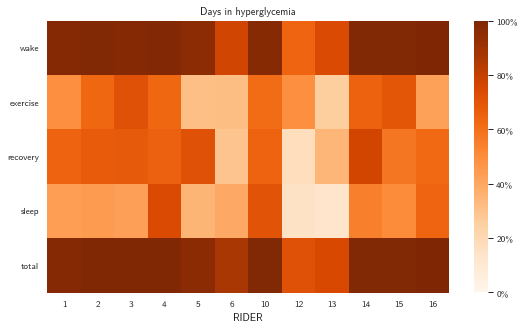

In [83]:
fig, ax = plt.subplots(figsize=(9,5))
sns.heatmap(dc_hyper.T, vmin=0, vmax=100, cmap='Oranges')
fig.get_axes()[1].set_yticks(np.arange(0,101,20), ["{:.0f}%".format(j) for j in np.arange(0,101,20)])
plt.yticks(rotation=0)
plt.title("Days in hyperglycemia")

Text(0.5, 1.0, 'Days in hypoglycemia')

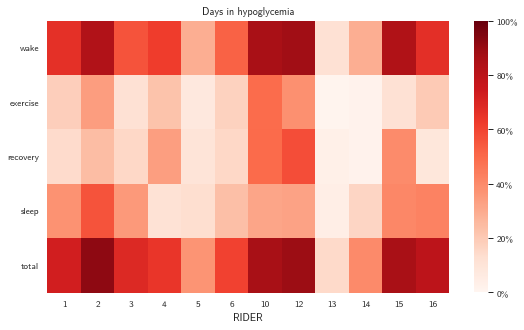

In [84]:
fig, ax = plt.subplots(figsize=(9,5))
sns.heatmap(dc_hypo.T, vmin=0, vmax=100, cmap='Reds')
fig.get_axes()[1].set_yticks(np.arange(0,101,20), ["{:.0f}%".format(j) for j in np.arange(0,101,20)])

plt.yticks(rotation=0)
plt.title("Days in hypoglycemia")

In [85]:
dc_events = {}
for sec in SECTIONS+('1d',):
    dc_events[sec] = dc_agg[['time_in_hypo_'+sec, 'time_in_hyper_'+sec]].div(dc_agg['count_'+sec], axis=0)
    dc_events[sec].columns = ['_'.join(col.split('_')[:-1]) for col in dc_events[sec].columns]
    dc_events[sec] *= 100
    dc_events[sec] = dc_events[sec].sort_index(level=1)
    mask = (dc_events[sec]['time_in_hypo'] != 0) & (dc_events[sec]['time_in_hyper'] != 0)
    dc_events[sec].loc[mask, 'time_in_both'] = dc_events[sec]['time_in_hypo'] + dc_events[sec]['time_in_hyper']
    dc_events[sec].loc[mask, ['time_in_hypo', 'time_in_hyper']] = 0
    dc_events[sec] = dc_events[sec].replace({0:np.nan})

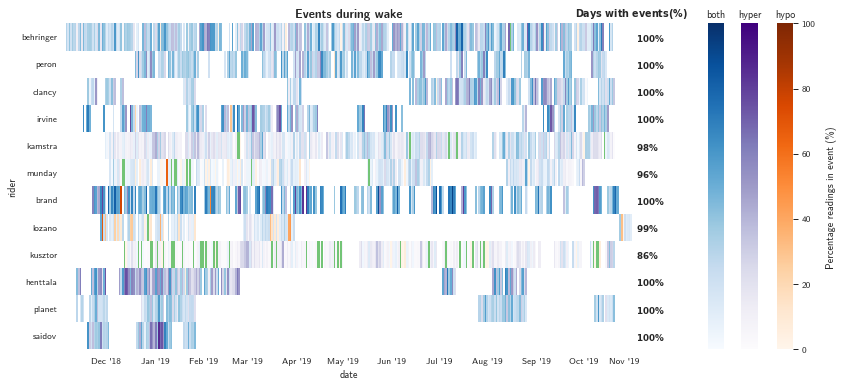

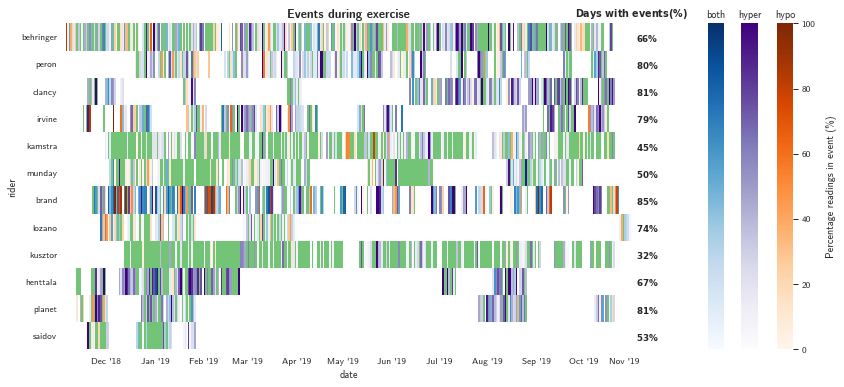

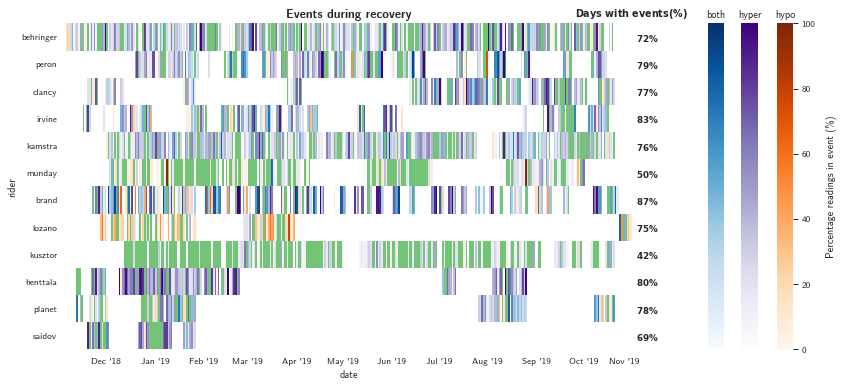

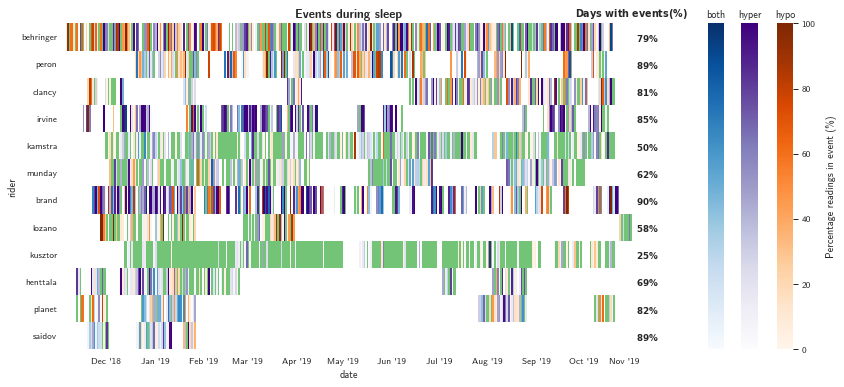

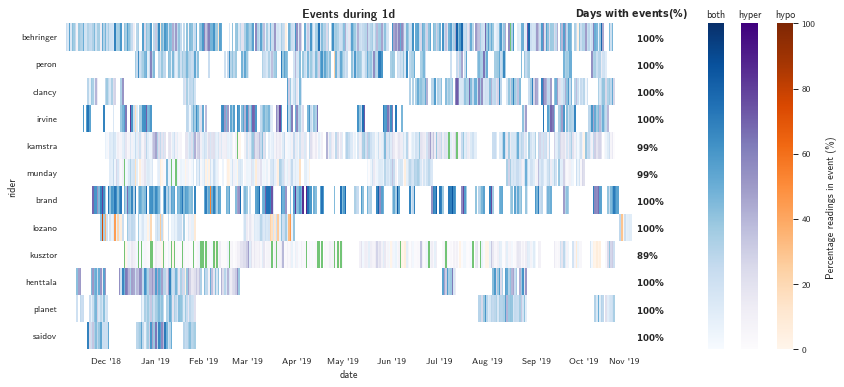

In [86]:
EVENTS = {'hypo': {'cmap':'Oranges', 'cbar_kws':{'pad':-0.1}},
          'hyper':{'cmap':'Purples', 'cbar_kws':{'pad':-0.1}}, 
          'both': {'cmap':'Blues'  , 'cbar_kws':{'pad':0.1}}}
for sec in SECTIONS+('1d',):
    fig, ax = plt.subplots(figsize=(15,6))
    
    df_avail = dc_events[sec].isna().all(axis=1).astype(float).unstack()
    sns.heatmap(df_avail, ax=ax, vmin=0, vmax=2, cmap='Greens', cbar=False)
    for event, kwargs in EVENTS.items():
        df_avail = dc_events[sec]['time_in_'+event].unstack()
        sns.heatmap(df_avail, ax=ax, vmin=0, vmax=100, **kwargs)
    
    # percentage columns
    perc_events = dc_events[sec].unstack().count(axis=1)/\
        dc_events[sec].reset_index().groupby('RIDER')['date'].count()*100
    ax2 = ax.secondary_yaxis("right")
    ax2.set_yticks(np.arange(len(df_avail.index))+0.5)
    ax2.set_yticklabels([r"$\bf{:.0f}\%$".format(i) for i in perc_events])
    ax2.tick_params(axis='y', length=0)
    ax2.spines['right'].set_visible(False)
    ax.text(0.9, 1.02, r'$\bf{:s}$'.format('Days\ with\ events (\%)'), ha='left', transform=ax.transAxes) 
    
    # colorbar
    for j, cbar_ax in enumerate(fig.get_axes()[1:]):
        if j != 0:
            cbar_ax.set_yticks([]) ; cbar_ax.set_yticklabels([])
        cbar_ax.set_title(list(EVENTS.keys())[j])
        if j == 0:
            cbar_ax.text(3, dc_events[sec].max().max()/2, 'Percentage readings in event (%)', va='center', rotation=90)
            
    monthyear = df_avail.columns.strftime("%b '%y")
    ticksloc = np.where(monthyear.to_series().shift() != monthyear.to_series())[0][1:]
    plt.xticks(ticks=ticksloc, labels=monthyear[ticksloc], rotation=0)
    plt.xlabel('date')
    plt.ylabel('rider')
    plt.title('Events during '+sec, fontweight='bold', fontsize=12)
    savefig('events/events', i=sec, yticks=ax)

### Stats

**Stats for patient population**

In [82]:
# ------ info
cols_info = {'age'    : 'Age (yr)',
             'gender' : 'Sex (male/female)',
             'height' : 'Height (cm)',
             'weight' : 'Weight (kg)',
             'bf(%)'  : 'Fat mass (\%)'}

info['FTP_per_kg'] = info['FTP'] / info['weight']
info = info.drop('FTP', axis=1)

stats_info = info.loc[:,info.columns.isin(cols_info.keys())]
stats_info = stats_info.rename(columns=cols_info)

In [83]:
# ------ diabetes
cols_diab = {'diabetes_duration' : 'Diabetes duration (yr)',
             'HbA1c'             : 'HbA_{1c} (\%)',
             'cgm_days'          : 'Days with CGM coverage $\geq$ 70 \%'}

stats_diab = info.loc[:, info.columns.isin(cols_diab.keys())]
stats_diab['cgm_days'] = dc_agg.reset_index().groupby('RIDER')['date'].count()
stats_diab = stats_diab.rename(columns=cols_diab)

/local/home/evanweenen/.local/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [84]:
# ------ exercise
cols_ex = {'FTP_per_kg'                : 'Functional threshold power (W/kg)',
           'LTHR'                      : 'Lactate threshold heart rate (bpm)',
           'HRmax'                     : 'HR_{max} (bpm)',
           'VO2max'                    : 'VO_{2max} (mL/min/kg)',
           'days_per_year_cycled'      : 'Cycling (days/yr)',
           'days_per_year_raced'       : 'Competition (days/yr)',
           'km_per_year_cycled'        : 'Distance cycled (km/yr)',
           'mean_hours_per_day_cycled' : 'Mean time cycled (h/day)',
           'mean_km_per_day_cycled'    : 'Mean distance cycled (km/day)',
           'mean_m_per_day_ascended'   : 'Mean ascension (m/day)'}

tp_agg0 = tp_agg.set_index(['RIDER', 'date'])
tp_agg0.columns = tp_agg0.columns.get_level_values(1)
tp_agg0 = tp_agg0.reset_index()

stats_ex_yr = tp_agg0.groupby('RIDER').agg({'date'        :'count', 
                                            'race'        :'sum', 
                                            'distance_max':lambda x: x.sum()/1000})\
                           .rename(columns={'date'        :'days_per_year_cycled',
                                            'race'        :'days_per_year_raced',
                                            'distance_max':'km_per_year_cycled'})

stats_ex_day = tp_agg0.groupby('RIDER').agg({'timestamp_count'      :lambda x: x.mean()/3600,
                                             'distance_max'         :lambda x: x.mean()/1000,
                                             'elevation_gain_up_sum':'mean'})\
    .rename(columns={'timestamp_count'      :'mean_hours_per_day_cycled',
                     'distance_max'         :'mean_km_per_day_cycled',
                     'elevation_gain_up_sum':'mean_m_per_day_ascended'})

stats_ex = info[sorted(set(cols_ex.keys()) & set(info.columns))]
stats_ex = pd.merge(stats_ex, stats_ex_yr, left_index=True, right_index=True, how='outer')
stats_ex = pd.merge(stats_ex, stats_ex_day, left_index=True, right_index=True, how='outer')
stats_ex = stats_ex.rename(columns=cols_ex)

In [85]:
stats = pd.concat([stats_info, stats_diab, stats_ex], axis=1)
stats

Sex (male/female)  Age (yr)  Weight (kg)  Fat mass (\%)  Height (cm)  \
RIDER                                                                        
1                     M        22    60.500000       9.066667        174.0   
2                     M        30    71.633333       8.833333        178.0   
3                     M        26    66.733333       6.566667        171.0   
4                     M        19    78.666667       9.433333        178.0   
5                     M        25    69.633333       7.700000        183.0   
6                     M        20    56.700000       4.950000        169.0   
9                     M        27    75.466667       7.700000        185.0   
10                    M        30    64.000000       5.600000        178.0   
11                    M        34    60.333333       4.866667        179.0   
12                    M        27    75.166667       9.333333        187.0   
13                    M        25    73.766667       7.200000        179.0   
14                    M        22    56.666667       9.466667        170.0   

       Diabetes duration (yr)  HbA_{1c} (\%)  \
RIDER                                          
1                          11            6.7   
2                          14            6.6   
3                           7            6.8   
4                           7            7.8   
5                           6            6.5   
6                           9            6.4   
9                          17            7.3   
10                          8            6.0   
11                          1            6.3   
12                         17            7.1   
13                         15            6.4   
14                         13            6.6   

       Days with CGM coverage $\geq$ 70 \%  Functional threshold power (W/kg)  \
RIDER                                                                           
1                                      323                           5.074380   
2                                      178                           4.550954   
3                                      144                           4.465534   
4                                      133                           4.525424   
5                                      302                           4.897080   
6                                      206                           5.264550   
9                                      201                           5.000000   
10                                      98                           5.421875   
11                                     277                           5.729282   
12                                     113                           4.629712   
13                                      94                           5.273385   
14                                      46                           5.000000   

       HR_{max} (bpm)  Lactate threshold heart rate (bpm)  \
RIDER                                                       
1          192.333333                          176.333333   
2          181.666667                          168.666667   
3          180.000000                          171.000000   
4          187.333333                          170.333333   
5          192.666667                          179.666667   
6          184.500000                          173.000000   
9          194.333333                          177.000000   
10         178.666667                          158.333333   
11         182.333333                          173.000000   
12         189.500000                          169.000000   
13         198.000000                          185.000000   
14         200.333333                          125.610000   

       VO_{2max} (mL/min/kg)  Cycling (days/yr)  Competition (days/yr)  \
RIDER                                                                    
1                  68.888889                287                     30   
2                  66.915285

Calculate mean and std over all riders and write to latex

In [86]:
def agg_gender(x):
    count = x.value_counts()
    male = count['M'] if 'M' in count else 0
    female = count['F'] if 'F' in count else 0
    return f'{male}/{female}'

In [87]:
stats_agg = pd.concat([stats.median(), stats.quantile(0.25), stats.quantile(0.75)], axis=1).round(1)
stats_agg = pd.concat([pd.Series(stats['Sex (male/female)'].agg(agg_gender), index=['Sex (male/female)']),
                       stats_agg])

stats_agg = stats_agg.rename(columns={0.00:'median', 0.25:'p25', 0.75:'p75'})
stats_agg.to_csv(SAVE_PATH+"stats.csv")

In [88]:
stats_agg

median      p25      p75
Sex (male/female)                       12/0      NaN      NaN
Age (yr)                                25.5     22.0     27.8
Weight (kg)                             68.2     60.5     74.1
Fat mass (\%)                            7.7      6.3      9.1
Height (cm)                            178.0    173.2    180.0
Diabetes duration (yr)                  10.0      7.0     14.2
HbA_{1c} (\%)                            6.6      6.4      6.9
Days with CGM coverage $\geq$ 70 \%    161.0    109.2    223.8
Functional threshold power (W/kg)        5.0      4.6      5.3
HR_{max} (bpm)                         188.4    182.2    193.1
Lactate threshold heart rate (bpm)     172.0    168.9    176.5
VO_{2max} (mL/min/kg)                   69.8     66.9     74.2
Cycling (days/yr)                      288.5    254.0    300.5
Competition (days/yr)                   36.0     23.0     47.2
Distance cycled (km/yr)              25042.6  22698.8  29268.4
Mean time cycled (h/day)                 3.1      3.0      3.3
Mean distance cycled (km/day)           97.1     89.3    103.2
Mean ascension (m/day)                1229.9   1123.2   1317.5

In [89]:
stats_agg = stats_agg.apply(lambda x: f"{x['median']} & ({x['p25']} & {x['p75']})", axis=1)

with open(SAVE_PATH+"stats.tex", 'w') as file:
	file.write(stats_agg.to_latex(column_format='c', escape=False))

**Stats for CGM**

In [90]:
cols_cgm = {'glucose_mean'    : 'Mean glucose (mg/dL)',
            'glucose_cv'      : 'Glycemic variability (\%)',
            'time_in_hypoL2'  : 'hypoglycemia L2 (<54 mg/dL)',
            'time_in_hypoL1'  : 'hypoglycemia L1 (54-69 mg/dL)',
            'time_in_target'  : 'target range (70-180 mg/dL)',
            'time_in_hyperL1' : 'hyperglycemia L1 (181-250 mg/dL)',
            'time_in_hyperL2' : 'hyperglycemia L2 (>250 mg/dL)'}

In [91]:
# TODO: check if still in line with new value of glucose_levels
# calculate dysglycemia events
dc['hypo'] = dc.groupby('RIDER')[COL].transform(lambda x: (x <= glucose_levels['hypo L1'][1]) \
														& (x.shift(1) <= glucose_levels['hypo L1'][1]) \
														& (x.shift(2) <= glucose_levels['hypo L1'][1]))
dc['hyper'] = dc.groupby('RIDER')[COL].transform(lambda x: (x >= glucose_levels['hyper L1'][0]) \
														 & (x.shift(1) >= glucose_levels['hyper L1'][0]) \
														 & (x.shift(2) >= glucose_levels['hyper L1'][0]))

# glucose rate
dc['glucose_rate'] = dc[COL] / (dc['timestamp'].diff()/pd.to_timedelta('5min'))

In [92]:
def get_stats_cgm(dc):
    stats = {'Total': dc.groupby('RIDER').apply(stat_func).apply(pd.Series)}
    stats.update({sec: dc[dc[sec]].groupby('RIDER').apply(stat_func).apply(pd.Series) for sec in SECTIONS})
    
    for k, df in stats.items():
        df.columns = df.columns.str.rstrip('_')
        cols_time = df.columns.str.startswith('time_in')
        df.loc[:, cols_time] = df.loc[:, cols_time].div(df['count'], axis=0) * 100 # calculate perc
        df['glucose_cv'] *= 100
        df = df[['glucose_mean', 'glucose_cv', 'time_in_hypoL2', 'time_in_hypoL1',
           'time_in_target', 'time_in_hyperL1', 'time_in_hyperL2']]
        stats[k] = df
    stats = pd.concat(stats, axis=1)
    
    stats = pd.concat([stats.median(), stats.quantile(0.25), stats.quantile(0.75)], axis=1)
    stats = stats.rename(columns={0.00:'median', 0.25:'p25', 0.75:'p75'})
    stats = stats.round(1)

    # some overly difficult way to get it to the right format
    stats.index = stats.index.swaplevel(0,1)
    stats = stats.unstack()
    stats.columns = stats.columns.swaplevel(0,1)
    
    stats = stats.rename(index=cols_cgm)
    stats = stats[['Total', 'wake', 'sleep', 'exercise', 'recovery']]
    
    return stats

In [93]:
def highlight_cell(stats, col, func):
    stats.loc[col, pd.IndexSlice[:,'median']] = stats.loc[col,pd.IndexSlice[:,'median']].applymap(func)
    return stats

In [94]:
tnames = {'all'  : r"All days (d={:.0f})".format(len(dc[['RIDER', 'date_6h']].drop_duplicates())),
          'race' : r"Competition days (d={:.0f})".format(len(dc.loc[dc['race'], ['RIDER', 'date_6h']].drop_duplicates())),
          'train': r"Training days (d={:.0f})".format(len(dc.loc[~dc['race'], ['RIDER', 'date_6h']].drop_duplicates()))}
tnames

{'all': 'All days (d=2115)',
 'race': 'Competition days (d=331)',
 'train': 'Training days (d=1936)'}

In [95]:
stats_cgm = {'all'  : get_stats_cgm(dc),
             'race' : get_stats_cgm(dc[dc['race']]),
             'train': get_stats_cgm(dc[~dc['race']])}

stats_cgm0 = pd.DataFrame(columns=stats_cgm['all'].columns)
for name, stats in stats_cgm.items():
    row = pd.DataFrame(np.nan, index=[tnames[name]], columns=stats_cgm['all'].columns)
    stats_cgm0 = pd.concat([stats_cgm0, row, stats])
stats_cgm = stats_cgm0
stats_cgm.to_csv(SAVE_PATH+"stats_cgm.csv")

In [96]:
stats_cgm

Total                 wake                \
                                 median    p25    p75 median    p25    p75   
All days (d=2115)                   NaN    NaN    NaN    NaN    NaN    NaN   
Mean glucose (mg/dL)              145.3  135.3  157.0  150.4  138.3  160.7   
Glycemic variability (\%)          39.9   34.0   41.7   38.9   33.3   40.9   
hypoglycemia L2 (<54 mg/dL)         1.3    0.4    2.9    0.8    0.3    1.9   
hypoglycemia L1 (54-69 mg/dL)       4.2    2.2    6.4    3.5    1.9    5.2   
target range (70-180 mg/dL)        66.1   62.4   82.2   66.6   59.2   81.9   
hyperglycemia L1 (181-250 mg/dL)   17.9   12.6   22.2   18.7   13.4   23.7   
hyperglycemia L2 (>250 mg/dL)       7.0    1.4    9.7    6.9    1.4   10.0   
Competition days (d=331)            NaN    NaN    NaN    NaN    NaN    NaN   
Mean glucose (mg/dL)              143.7  140.5  164.1  153.3  142.8  166.0   
Glycemic variability (\%)          37.5   28.9   40.7   36.8   30.2   38.0   
hypoglycemia L2 (<54 mg/dL)         0.4    0.3    1.8    0.5    0.3    1.4   
hypoglycemia L1 (54-69 mg/dL)       2.2    1.3    4.2    2.2    0.9    3.9   
target range (70-180 mg/dL)        64.3   59.4   84.3   68.9   58.2   81.5   
hyperglycemia L1 (181-250 mg/dL)   17.7   13.3   24.9   18.7   15.5   25.0   
hyperglycemia L2 (>250 mg/dL)       7.0    1.2   12.1    5.9    1.6   11.7   
Training days (d=1936)              NaN    NaN    NaN    NaN    NaN    NaN   
Mean glucose (mg/dL)              144.6  135.3  157.1  149.5  137.5  158.4   
Glycemic variability (\%)          40.4   33.7   42.5   39.2   32.9   41.4   
hypoglycemia L2 (<54 mg/dL)         1.4    0.4    2.9    0.8    0.3    1.8   
hypoglycemia L1 (54-69 mg/dL)       4.3    2.2    6.5    3.9    1.9    5.3   
target range (70-180 mg/dL)        66.5   62.7   82.0   67.2   59.4   82.0   
hyperglycemia L1 (181-250 mg/dL)   17.6   12.6   21.6   18.6   13.2   22.9   
hyperglycemia L2 (>250 mg/dL)       6.9    1.4    9.4    6.8    1.5    9.5   

                                  sleep               exercise                \
                                 median    p25    p75   median    p25    p75   
All days (d=2115)                   NaN    NaN    NaN      NaN    NaN    NaN   
Mean glucose (mg/dL)              134.9  126.1  143.5    143.6  130.4  163.0   
Glycemic variability (\%)          40.3   36.0   46.8     36.9   34.9   44.3   
hypoglycemia L2 (<54 mg/dL)         2.3    0.7    4.2      0.5    0.2    1.1   
hypoglycemia L1 (54-69 mg/dL)       6.2    2.1    8.8      3.4    2.0    4.9   
target range (70-180 mg/dL)        72.4   62.4   80.7     71.0   58.7   83.0   
hyperglycemia L1 (181-250 mg/dL)   13.6    9.2   16.5     14.5    9.3   26.8   
hyperglycemia L2 (>250 mg/dL)       3.7    1.5    8.1      7.9    1.3   10.6   
Competition days (d=331)            NaN    NaN    NaN      NaN    NaN    NaN   
Mean glucose (mg/dL)              142.4  127.3  163.6    170.6  160.3  178.0   
Glycemic variability (\%)          32.7   23.3   47.2     30.0   29.1   38.0   
hypoglycemia L2 (<54 mg/dL)         0.3    0.0    3.4      0.0    0.0    0.2   
hypoglycemia L1 (54-69 mg/dL)       2.7    0.4    5.7      0.5    0.1    1.5   
target range (70-180 mg/dL)        75.0   51.5   91.8     58.6   56.4   68.9   
hyperglycemia L1 (181-250 mg/dL)   13.4    6.0   22.1     23.6   20.3   31.3   
hyperglycemia L2 (>250 mg/dL)       0.5    0.0   17.1     12.0    7.0   18.0   
Training days (d=1936)              NaN    NaN    NaN      NaN    NaN    NaN   
Mean glucose (mg/dL)              135.2  125.9  140.0    137.5  125.6  151.4   
Glycemic variability (\%)          40.1   36.1   47.6     37.5   35.0   44.3   
hypoglycemia L2 (<54 mg/dL)         2.7    0.7    4.4      0.6    0.2    1.1   
hypoglycemia L1 (54-69 mg/dL)       5.9    2.3    9.5      3.4    2.2    6.3   
target range (70-180 mg/dL)        72.0   61.8   79.9     74.0   61.8   83.5   
hyperglycemia L1 (181-250 mg/dL)   13.3   10.2   16.4     14.1    8.5   22.7   
hyper

In [97]:
#stats_cgm = highlight_cell(stats_cgm, 'Mean glucose (mg/dL)', lambda x: pd.DataFrame(False, index=x.index, columns=x.columns))
stats_cgm = highlight_cell(stats_cgm, 'Glycemic variability (\%)', lambda x: '\hl'+str(x) if x > 37 else x)
stats_cgm = highlight_cell(stats_cgm, 'hypoglycemia L2 (<54 mg/dL)', lambda x: '\hl'+str(x) if x > 1 else x)
stats_cgm = highlight_cell(stats_cgm, 'hypoglycemia L1 (54-69 mg/dL)', lambda x: '\hl'+str(x) if x > 3 else x)
stats_cgm = highlight_cell(stats_cgm, 'target range (70-180 mg/dL)', lambda x: '\hl'+str(x) if x < 70 else x)
stats_cgm = highlight_cell(stats_cgm, 'hyperglycemia L1 (181-250 mg/dL)', lambda x: '\hl'+str(x) if x > 20 else x)
stats_cgm = highlight_cell(stats_cgm, 'hyperglycemia L2 (>250 mg/dL)', lambda x: '\hl'+str(x) if x > 5 else x)

In [98]:
stats_cgm.index = pd.MultiIndex.from_arrays([8*['all']+8*['comp']+8*['train'], stats_cgm.index])
stats_cgm.columns = stats_cgm.columns.swaplevel(0,1)
stats_cgm = stats_cgm.stack(dropna=False)
#stats_cgm = stats_cgm.apply(lambda x: f"{x['median']} ({x['p25']} - {x['p75']})", axis=1)
stats_cgm = stats_cgm.apply(lambda x: f"{x['median']} & \hl({x['p25']} - {x['p75']})" if str(x['median']).startswith('\hl') else (f"{x['median']} & ({x['p25']} - {x['p75']})" if x.isna().sum() != 3 else np.nan), axis=1)
stats_cgm = stats_cgm.unstack()
stats_cgm = stats_cgm.sort_index(key=lambda x: x.map({**{k:i for i, k in enumerate(tnames.keys())}, **{k:0 for k in tnames.values()}, **{k:i+1 for i, k in enumerate(cols_cgm.values())}}))
stats_cgm = stats_cgm[['Total', 'wake', 'sleep', 'exercise', 'recovery']]
stats_cgm = stats_cgm.rename(index={k: '\hspace{7mm}'+k for k in list(cols_cgm.values())[2:]})
stats_cgm = stats_cgm.reset_index().drop('level_0', axis=1).set_index('level_1')
with open(SAVE_PATH+"stats_cgm.tex", 'w') as file:
	file.write(stats_cgm.to_latex(column_format='lrrrrr', escape=False))

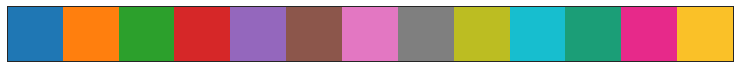

In [196]:
sns.palplot(sns.color_palette('tab10')+[sns.color_palette('Dark2')[0],
                                        sns.color_palette('Dark2')[3],
                                        sns.color_palette('inferno')[-1],
                                        sns.color_palette('inferno')])

In [432]:
sns.color_palette('YlGnBu', n_colors=6)

[(0.9101268742791234, 0.9649365628604383, 0.6956401384083045),
 (0.6984544405997694, 0.8818608227604767, 0.7138485198000769),
 (0.39601691657054977, 0.7660745866974241, 0.7481430219146482),
 (0.1729642445213379, 0.6295117262591311, 0.759523260284506),
 (0.12764321414840446, 0.42666666666666664, 0.6861361014994233),
 (0.14357554786620533, 0.22523644752018454, 0.5905420991926182)]

In [433]:
sns.color_palette('inferno', n_colors=6)

[(0.15585, 0.044559, 0.325338),
 (0.397674, 0.083257, 0.433183),
 (0.621685, 0.164184, 0.388781),
 (0.832299, 0.283913, 0.257383),
 (0.961293, 0.488716, 0.084289),
 (0.981173, 0.759135, 0.156863)]

In [434]:
sns.color_palette('gist_earth_r', n_colors=6)

[(0.8342929845025828, 0.6922737254901962, 0.5786758598521375),
 (0.7241726272770749, 0.7035188948306594, 0.37379467833956326),
 (0.5107321752862218, 0.6620551820728292, 0.32917535903993705),
 (0.25661406784936197, 0.5855013377926422, 0.32284437777281283),
 (0.19002743319550042, 0.5042304347826088, 0.49565724681625223),
 (0.09408431928011998, 0.25456763098682095, 0.4747997187719709)]

In [461]:
sns.color_palette('CMRmap')

[(0.16941176470588235, 0.15, 0.5323529411764706),
 (0.3870588235294118, 0.16450980392156864, 0.6774509803921569),
 (0.7678431372549019, 0.22098039215686274, 0.3531372549019608),
 (0.9419607843137255, 0.3950980392156863, 0.06294117647058822),
 (0.9, 0.6774509803921569, 0.07098039215686275),
 (0.9, 0.8805882352941177, 0.44823529411764707)]

In [464]:
sns.color_palette('plasma')

[(0.32515, 0.006915, 0.639512),
 (0.546157, 0.038954, 0.64701),
 (0.723444, 0.196158, 0.538981),
 (0.85975, 0.360588, 0.406917),
 (0.95547, 0.533093, 0.28549),
 (0.994495, 0.74088, 0.166335)]

In [465]:
sns.color_palette('inferno')

[(0.15585, 0.044559, 0.325338),
 (0.397674, 0.083257, 0.433183),
 (0.621685, 0.164184, 0.388781),
 (0.832299, 0.283913, 0.257383),
 (0.961293, 0.488716, 0.084289),
 (0.981173, 0.759135, 0.156863)]

In [466]:
sns.color_palette('rocket')

[(0.20973515, 0.09747934, 0.24238489),
 (0.43860848, 0.12177004, 0.34119475),
 (0.67824099, 0.09192342, 0.3504148),
 (0.8833417, 0.19830556, 0.26014181),
 (0.95381595, 0.46373781, 0.31769923),
 (0.96516917, 0.70776351, 0.5606593)]

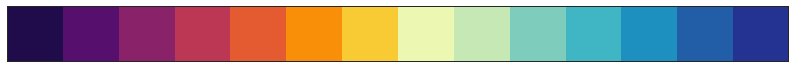

In [474]:
sns.palplot(sns.color_palette('inferno', n_colors=7)+sns.color_palette('YlGnBu', n_colors=7))

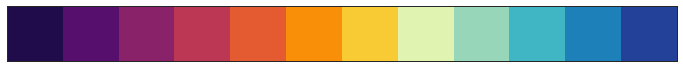

In [475]:
sns.palplot(sns.color_palette('inferno', n_colors=7)+sns.color_palette('YlGnBu', n_colors=5))

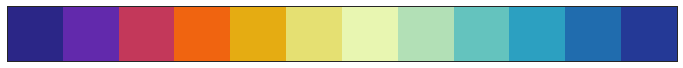

In [469]:
sns.palplot(sns.color_palette('CMRmap', n_colors=6)+sns.color_palette('YlGnBu', n_colors=6))

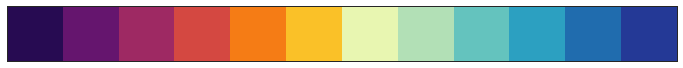

In [470]:
sns.palplot(sns.color_palette('inferno', n_colors=6)+sns.color_palette('YlGnBu', n_colors=6))

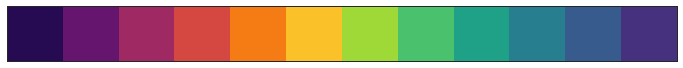

In [435]:
sns.palplot(sns.color_palette('inferno', n_colors=6)+sns.color_palette('viridis_r', n_colors=6))

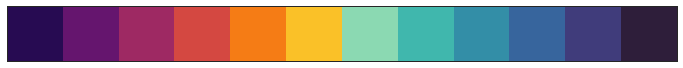

In [436]:
sns.palplot(sns.color_palette('inferno', n_colors=6)+sns.color_palette('mako_r', n_colors=6))

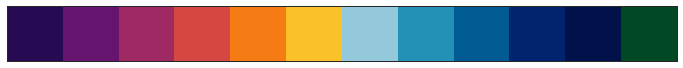

In [437]:
sns.palplot(sns.color_palette('inferno', n_colors=6)+sns.color_palette('ocean_r', n_colors=6))

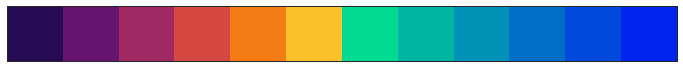

In [438]:
sns.palplot(sns.color_palette('inferno', n_colors=6)+sns.color_palette('winter_r', n_colors=6))

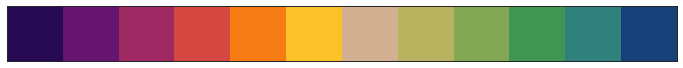

In [439]:
sns.palplot(sns.color_palette('inferno', n_colors=6)+sns.color_palette('gist_earth_r', n_colors=6))

In [440]:
sns.color_palette('tab20b')

[(0.2235294117647059, 0.23137254901960785, 0.4745098039215686),
 (0.3215686274509804, 0.32941176470588235, 0.6392156862745098),
 (0.4196078431372549, 0.43137254901960786, 0.8117647058823529),
 (0.611764705882353, 0.6196078431372549, 0.8705882352941177),
 (0.38823529411764707, 0.4745098039215686, 0.2235294117647059),
 (0.5490196078431373, 0.6352941176470588, 0.3215686274509804),
 (0.7098039215686275, 0.8117647058823529, 0.4196078431372549),
 (0.807843137254902, 0.8588235294117647, 0.611764705882353),
 (0.5490196078431373, 0.42745098039215684, 0.19215686274509805),
 (0.7411764705882353, 0.6196078431372549, 0.2235294117647059),
 (0.9058823529411765, 0.7294117647058823, 0.3215686274509804),
 (0.9058823529411765, 0.796078431372549, 0.5803921568627451),
 (0.5176470588235295, 0.23529411764705882, 0.2235294117647059),
 (0.6784313725490196, 0.28627450980392155, 0.2901960784313726),
 (0.8392156862745098, 0.3803921568627451, 0.4196078431372549),
 (0.9058823529411765, 0.5882352941176471, 0.611764705882353),
 (0.4823529411764706, 0.2549019607843137, 0.45098039215686275),
 (0.6470588235294118, 0.3176470588235294, 0.5803921568627451),
 (0.807843137254902, 0.42745098039215684, 0.7411764705882353),
 (0.8705882352941177, 0.6196078431372549, 0.8392156862745098)]

In [441]:
sns.color_palette('tab10')

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)]

In [442]:
sns.color_palette('Dark2')

[(0.10588235294117647, 0.6196078431372549, 0.4666666666666667),
 (0.8509803921568627, 0.37254901960784315, 0.00784313725490196),
 (0.4588235294117647, 0.4392156862745098, 0.7019607843137254),
 (0.9058823529411765, 0.1607843137254902, 0.5411764705882353),
 (0.4, 0.6509803921568628, 0.11764705882352941),
 (0.9019607843137255, 0.6705882352941176, 0.00784313725490196),
 (0.6509803921568628, 0.4627450980392157, 0.11372549019607843),
 (0.4, 0.4, 0.4)]

In [443]:
sns.color_palette('gist_stern')

[(0.5691674045962472, 0.1411764705882353, 0.2823529411764706),
 (0.28627450980392155, 0.28627450980392155, 0.5725490196078431),
 (0.42745098039215684, 0.42745098039215684, 0.8549019607843137),
 (0.5725490196078431, 0.5725490196078431, 0.6912807676261994),
 (0.7137254901960784, 0.7137254901960784, 0.09052982895285744),
 (0.8588235294117648, 0.8588235294117647, 0.4672586015538292)]

In [444]:
sns.color_palette('brg')

[(0.2823529411764706, 0.0, 0.7176470588235294),
 (0.5725490196078431, 0.0, 0.4274509803921569),
 (0.8549019607843137, 0.0, 0.14509803921568631),
 (0.8549019607843137, 0.1450980392156863, 0.0),
 (0.5725490196078431, 0.42745098039215684, 0.0),
 (0.2823529411764706, 0.7176470588235294, 0.0)]

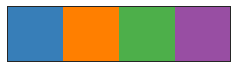

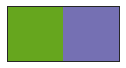

In [445]:
sns.palplot(color_sec.values()) ; plt.show()

sns.palplot([sns.color_palette('Dark2')[4], sns.color_palette('Dark2')[2]]) ; plt.show()

In [446]:
import seaborn as sns
sns.color_palette('colorblind')

[(0.00392156862745098, 0.45098039215686275, 0.6980392156862745),
 (0.8705882352941177, 0.5607843137254902, 0.0196078431372549),
 (0.00784313725490196, 0.6196078431372549, 0.45098039215686275),
 (0.8352941176470589, 0.3686274509803922, 0.0),
 (0.8, 0.47058823529411764, 0.7372549019607844),
 (0.792156862745098, 0.5686274509803921, 0.3803921568627451),
 (0.984313725490196, 0.6862745098039216, 0.8941176470588236),
 (0.5803921568627451, 0.5803921568627451, 0.5803921568627451),
 (0.9254901960784314, 0.8823529411764706, 0.2),
 (0.33725490196078434, 0.7058823529411765, 0.9137254901960784)]

In [447]:
sns.color_palette('Set1')

[(0.8941176470588236, 0.10196078431372549, 0.10980392156862745),
 (0.21568627450980393, 0.49411764705882355, 0.7215686274509804),
 (0.30196078431372547, 0.6862745098039216, 0.2901960784313726),
 (0.596078431372549, 0.3058823529411765, 0.6392156862745098),
 (1.0, 0.4980392156862745, 0.0),
 (1.0, 1.0, 0.2),
 (0.6509803921568628, 0.33725490196078434, 0.1568627450980392),
 (0.9686274509803922, 0.5058823529411764, 0.7490196078431373),
 (0.6, 0.6, 0.6)]

In [448]:
from plot import palette_ath

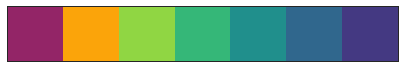

In [449]:
sns.palplot(sns.color_palette('inferno', n_colors=4)[1::2]+sns.color_palette('viridis_r', n_colors=5))

In [450]:
sns.color_palette('Set2')

[(0.4, 0.7607843137254902, 0.6470588235294118),
 (0.9882352941176471, 0.5529411764705883, 0.3843137254901961),
 (0.5529411764705883, 0.6274509803921569, 0.796078431372549),
 (0.9058823529411765, 0.5411764705882353, 0.7647058823529411),
 (0.6509803921568628, 0.8470588235294118, 0.32941176470588235),
 (1.0, 0.8509803921568627, 0.1843137254901961),
 (0.8980392156862745, 0.7686274509803922, 0.5803921568627451),
 (0.7019607843137254, 0.7019607843137254, 0.7019607843137254)]

In [451]:
sns.color_palette('Set3')

[(0.5529411764705883, 0.8274509803921568, 0.7803921568627451),
 (1.0, 1.0, 0.7019607843137254),
 (0.7450980392156863, 0.7294117647058823, 0.8549019607843137),
 (0.984313725490196, 0.5019607843137255, 0.4470588235294118),
 (0.5019607843137255, 0.6941176470588235, 0.8274509803921568),
 (0.9921568627450981, 0.7058823529411765, 0.3843137254901961),
 (0.7019607843137254, 0.8705882352941177, 0.4117647058823529),
 (0.9882352941176471, 0.803921568627451, 0.8980392156862745),
 (0.8509803921568627, 0.8509803921568627, 0.8509803921568627),
 (0.7372549019607844, 0.5019607843137255, 0.7411764705882353),
 (0.8, 0.9215686274509803, 0.7725490196078432),
 (1.0, 0.9294117647058824, 0.43529411764705883)]

In [452]:
sns.color_palette('Set1')

[(0.8941176470588236, 0.10196078431372549, 0.10980392156862745),
 (0.21568627450980393, 0.49411764705882355, 0.7215686274509804),
 (0.30196078431372547, 0.6862745098039216, 0.2901960784313726),
 (0.596078431372549, 0.3058823529411765, 0.6392156862745098),
 (1.0, 0.4980392156862745, 0.0),
 (1.0, 1.0, 0.2),
 (0.6509803921568628, 0.33725490196078434, 0.1568627450980392),
 (0.9686274509803922, 0.5058823529411764, 0.7490196078431373),
 (0.6, 0.6, 0.6)]

In [453]:
sns.color_palette('tab10')

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)]

In [454]:
sns.color_palette('tab20', n_colors=14)

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (0.6823529411764706, 0.7803921568627451, 0.9098039215686274),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (1.0, 0.7333333333333333, 0.47058823529411764),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.596078431372549, 0.8745098039215686, 0.5411764705882353),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (1.0, 0.596078431372549, 0.5882352941176471),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.7725490196078432, 0.6901960784313725, 0.8352941176470589),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.7686274509803922, 0.611764705882353, 0.5803921568627451),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.9686274509803922, 0.7137254901960784, 0.8235294117647058)]

In [455]:
sns.color_palette('tab20b')

[(0.2235294117647059, 0.23137254901960785, 0.4745098039215686),
 (0.3215686274509804, 0.32941176470588235, 0.6392156862745098),
 (0.4196078431372549, 0.43137254901960786, 0.8117647058823529),
 (0.611764705882353, 0.6196078431372549, 0.8705882352941177),
 (0.38823529411764707, 0.4745098039215686, 0.2235294117647059),
 (0.5490196078431373, 0.6352941176470588, 0.3215686274509804),
 (0.7098039215686275, 0.8117647058823529, 0.4196078431372549),
 (0.807843137254902, 0.8588235294117647, 0.611764705882353),
 (0.5490196078431373, 0.42745098039215684, 0.19215686274509805),
 (0.7411764705882353, 0.6196078431372549, 0.2235294117647059),
 (0.9058823529411765, 0.7294117647058823, 0.3215686274509804),
 (0.9058823529411765, 0.796078431372549, 0.5803921568627451),
 (0.5176470588235295, 0.23529411764705882, 0.2235294117647059),
 (0.6784313725490196, 0.28627450980392155, 0.2901960784313726),
 (0.8392156862745098, 0.3803921568627451, 0.4196078431372549),
 (0.9058823529411765, 0.5882352941176471, 0.611764705882353),
 (0.4823529411764706, 0.2549019607843137, 0.45098039215686275),
 (0.6470588235294118, 0.3176470588235294, 0.5803921568627451),
 (0.807843137254902, 0.42745098039215684, 0.7411764705882353),
 (0.8705882352941177, 0.6196078431372549, 0.8392156862745098)]

In [456]:
sns.color_palette('tab20c')

[(0.19215686274509805, 0.5098039215686274, 0.7411764705882353),
 (0.4196078431372549, 0.6823529411764706, 0.8392156862745098),
 (0.6196078431372549, 0.792156862745098, 0.8823529411764706),
 (0.7764705882352941, 0.8588235294117647, 0.9372549019607843),
 (0.9019607843137255, 0.3333333333333333, 0.050980392156862744),
 (0.9921568627450981, 0.5529411764705883, 0.23529411764705882),
 (0.9921568627450981, 0.6823529411764706, 0.4196078431372549),
 (0.9921568627450981, 0.8156862745098039, 0.6352941176470588),
 (0.19215686274509805, 0.6392156862745098, 0.32941176470588235),
 (0.4549019607843137, 0.7686274509803922, 0.4627450980392157),
 (0.6313725490196078, 0.8509803921568627, 0.6078431372549019),
 (0.7803921568627451, 0.9137254901960784, 0.7529411764705882),
 (0.4588235294117647, 0.4196078431372549, 0.6941176470588235),
 (0.6196078431372549, 0.6039215686274509, 0.7843137254901961),
 (0.7372549019607844, 0.7411764705882353, 0.8627450980392157),
 (0.8549019607843137, 0.8549019607843137, 0.9215686274509803),
 (0.38823529411764707, 0.38823529411764707, 0.38823529411764707),
 (0.5882352941176471, 0.5882352941176471, 0.5882352941176471),
 (0.7411764705882353, 0.7411764705882353, 0.7411764705882353),
 (0.8509803921568627, 0.8509803921568627, 0.8509803921568627)]

In [457]:
sns.color_palette('Paired')

[(0.6509803921568628, 0.807843137254902, 0.8901960784313725),
 (0.12156862745098039, 0.47058823529411764, 0.7058823529411765),
 (0.6980392156862745, 0.8745098039215686, 0.5411764705882353),
 (0.2, 0.6274509803921569, 0.17254901960784313),
 (0.984313725490196, 0.6039215686274509, 0.6),
 (0.8901960784313725, 0.10196078431372549, 0.10980392156862745),
 (0.9921568627450981, 0.7490196078431373, 0.43529411764705883),
 (1.0, 0.4980392156862745, 0.0),
 (0.792156862745098, 0.6980392156862745, 0.8392156862745098),
 (0.41568627450980394, 0.23921568627450981, 0.6039215686274509),
 (1.0, 1.0, 0.6),
 (0.6941176470588235, 0.34901960784313724, 0.1568627450980392)]

In [458]:
sns.color_palette('Dark2')

[(0.10588235294117647, 0.6196078431372549, 0.4666666666666667),
 (0.8509803921568627, 0.37254901960784315, 0.00784313725490196),
 (0.4588235294117647, 0.4392156862745098, 0.7019607843137254),
 (0.9058823529411765, 0.1607843137254902, 0.5411764705882353),
 (0.4, 0.6509803921568628, 0.11764705882352941),
 (0.9019607843137255, 0.6705882352941176, 0.00784313725490196),
 (0.6509803921568628, 0.4627450980392157, 0.11372549019607843),
 (0.4, 0.4, 0.4)]

In [459]:
sns.color_palette('gist_stern', n_colors=14)

[(0.9403811230585424, 0.06666666666666667, 0.13333333333333333),
 (0.6082425328554361, 0.13333333333333333, 0.26666666666666666),
 (0.27610394265232974, 0.2, 0.4),
 (0.26666666666666666, 0.26666666666666666, 0.5333333333333333),
 (0.3333333333333333, 0.3333333333333333, 0.6666666666666666),
 (0.4, 0.4, 0.8),
 (0.4666666666666667, 0.4666666666666667, 0.9333333333333333),
 (0.5333333333333333, 0.5333333333333333, 0.8581560283687943),
 (0.6, 0.6, 0.5744680851063828),
 (0.6666666666666667, 0.6666666666666666, 0.2907801418439714),
 (0.7333333333333334, 0.7333333333333333, 0.007092198581559961),
 (0.7999999999999999, 0.8, 0.24528301886792472),
 (0.8666666666666667, 0.8666666666666667, 0.4968553459119498),
 (0.9333333333333333, 0.9333333333333333, 0.7484276729559749)]

In [460]:
sns.color_palette('brg')

[(0.2823529411764706, 0.0, 0.7176470588235294),
 (0.5725490196078431, 0.0, 0.4274509803921569),
 (0.8549019607843137, 0.0, 0.14509803921568631),
 (0.8549019607843137, 0.1450980392156863, 0.0),
 (0.5725490196078431, 0.42745098039215684, 0.0),
 (0.2823529411764706, 0.7176470588235294, 0.0)]

In [467]:
sns.color_palette('Spectral', n_colors=12)

[(0.7803152633602461, 0.182160707420223, 0.2968089196462899),
 (0.8996539792387543, 0.340715109573241, 0.2848904267589389),
 (0.9679354094579008, 0.5074202229911572, 0.2996539792387543),
 (0.9923875432525952, 0.6938869665513263, 0.3900807381776239),
 (0.9954632833525567, 0.8476739715494039, 0.519261822376009),
 (0.9985390234525182, 0.9547097270280661, 0.6730488273740869),
 (0.9634755863129566, 0.9853902345251826, 0.6920415224913495),
 (0.8656670511341794, 0.9460207612456749, 0.6034602076124567),
 (0.6841983852364477, 0.8722029988465976, 0.6403690888119954),
 (0.48489042675893923, 0.7940023068050751, 0.6458285274894272),
 (0.30403690888119955, 0.6537485582468281, 0.6913494809688582),
 (0.24006151480199922, 0.47635524798154555, 0.7141868512110727)]

In [468]:
sns.color_palette('RdYlBu', n_colors=12)

[(0.7931564782775855, 0.14025374855824682, 0.15194156093810074),
 (0.9033448673587082, 0.314878892733564, 0.2110726643598616),
 (0.9679354094579008, 0.5074202229911572, 0.2996539792387543),
 (0.9923875432525952, 0.6938869665513263, 0.3912341407151095),
 (0.9954632833525567, 0.8476739715494039, 0.5357939254133024),
 (0.9985390234525182, 0.9547097270280661, 0.6803537101114956),
 (0.9547097270280662, 0.9824682814302191, 0.8322952710495962),
 (0.8458285274894274, 0.9369473279507883, 0.9633217993079586),
 (0.682814302191465, 0.8569780853517879, 0.9171856978085352),
 (0.5225682429834682, 0.7325643983083432, 0.8491349480968859),
 (0.3681660899653979, 0.5750865051903115, 0.7660899653979238),
 (0.25059592464436753, 0.39584775086505186, 0.6748942714340639)]